# Machine learning course IQTC UB
This notebook contains all the code and examples presented in the machine-learning session of the summer course on computational chemistry offered by the IQTCUB.

For best results, this notebook and the included database files should be copied to your own drive space (a google account is required for this). 

To start running the notebook, you will be asked to sign in to your google account and add a password that google will generate. This will allocate some cloud-computing resources to your session, which will allow you to run the notebook without the need to install anything locally.

As with any python code, the first step is to import the necessary packages. 

- numpy is use for numerical calculus 
- matplotlib.pyplot is used for plotting
- pandas is used for loading and manipulating data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.dpi'] = 300
print("hola!")

hola!


# Loading Eads database

We will begin by working with a data base of adsorption energies of different molecules on bimetallic surfaces calculated with DFT. 

The data for this example is taken from this article:

M. Andersen, S. V. Levchenko, M. Scheffler, K. Reuter, ACS Catal. 2019, 9, 2752–2759 (http://pubs.acs.org/doi/10.1021/acscatal.8b04478)

We begin by loading the data.txt file, which contains all calculated data that we will use in the first part of the session.

For that, we mount a drive in our virtual space. This will ask for a password, which can be obtained by following the link.



In [2]:
# from google.colab import drive
# drive.mount("/content/drive")

# data = pd.read_csv('drive/MyDrive/ML_iqtcub/data.txt', sep='    ')


data = pd.read_csv('data.txt', sep='    ')

/Users/abruix/miniconda3/envs/npl/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


We can now take a look at the loaded database by simply typing 'data'. 

In [3]:
data

Samples  E_ads_eV  bulk_nnd_Ang  site_nnd_Ang  r_d_Ang  \
0         C_Ag_211_four-fold-s     5.100         2.985         2.965     0.89   
1               C_Ag_211_fcc-s     5.653         2.985         2.963     0.89   
2               C_Ag_211_hcp-s     5.642         2.985         2.955     0.89   
3               C_Ag_211_hcp-t     5.676         2.985         2.976     0.89   
4     C_AgAu_211_four-fold-s-1     5.136         2.988         2.961     0.95   
...                        ...       ...           ...           ...      ...   
1041          OH_Ni_100_bridge    -0.338         2.502         2.486     0.71   
1042          OH_Pd_100_bridge     0.354         2.819         2.816     0.94   
1043          OH_Pt_100_bridge     0.274         2.838         2.828     1.04   
1044          OH_Rh_100_bridge    -0.116         2.734         2.710     0.99   
1045          OH_Ru_100_bridge    -0.536         2.732         2.703     1.05   

      V_ad^2     CN  site_no  epsilon_d_eV  W_d_eV  S_d_eV  K_d_eV   W_eV  \
0      2.260  8.500        4        -4.042   1.034   2.954  21.737  4.427   
1      2.260  8.333        3        -4.024   1.059   3.219  24.252  4.427   
2      2.260  7.667        3        -4.016   0.996   3.021  23.078  4.427   
3      2.260  9.333        3        -4.047   1.126   3.305  24.126  4.427   
4      2.805  8.500        4        -3.602   1.221   2.127  14.442  4.854   
...      ...    ...      ...           ...     ...     ...     ...    ...   
1041   1.160  8.000        2        -1.173   1.742   2.723  18.018  5.115   
1042   2.780  8.000        2        -1.528   1.308   0.818   6.653  5.279   
1043   3.900  8.000        2        -1.842   1.864   0.654   5.256  5.881   
1044   3.320  8.000        2        -1.413   2.024   1.234   7.427  5.266   
1045   3.870  8.000        2        -1.197   2.030   0.432   3.927  5.109   

      IP_eV  EA_eV    f_d   f_sp     PE  DOS_d_eV^(-1)  DOS_sp_eV^(-1)  
0     7.576  1.304  9.847  1.128  1.930          0.037           0.276  
1     7.576  1.304  9.850  1.116  1.930          0.037           0.284  
2     7.576  1.304  9.853  1.084  1.930          0.034           0.287  
3     7.576  1.304  9.841  1.167  1.930          0.040           0.275  
4     8.401  1.807  9.765  1.185  2.235          0.061           0.250  
...     ...    ...    ...    ...    ...            ...             ...  
1041  7.640  1.157  8.690  1.198  1.910          1.900           0.173  
1042  8.337  0.562  9.316  0.721  2.200          1.883           0.135  
1043  8.959  2.125  8.860  1.119  2.280          1.687           0.152  
1044  7.459  1.143  7.942  1.054  2.280          1.839           0.184  
1045  7.361  1.046  7.128  0.861  2.200          1.969           0.238  

[1046 rows x 20 columns]

We can select to look only at some columns by specifying that within the call to data.

In [4]:
data[['Samples','E_ads_eV','epsilon_d_eV']]

Samples  E_ads_eV  epsilon_d_eV
0         C_Ag_211_four-fold-s     5.100        -4.042
1               C_Ag_211_fcc-s     5.653        -4.024
2               C_Ag_211_hcp-s     5.642        -4.016
3               C_Ag_211_hcp-t     5.676        -4.047
4     C_AgAu_211_four-fold-s-1     5.136        -3.602
...                        ...       ...           ...
1041          OH_Ni_100_bridge    -0.338        -1.173
1042          OH_Pd_100_bridge     0.354        -1.528
1043          OH_Pt_100_bridge     0.274        -1.842
1044          OH_Rh_100_bridge    -0.116        -1.413
1045          OH_Ru_100_bridge    -0.536        -1.197

[1046 rows x 3 columns]

We can also select just some desired rows by filtering by text.

In [5]:
mask_CO = data['Samples'].str.contains("CO_")

data_CO = data[mask_CO][['Samples','E_ads_eV','epsilon_d_eV']]


In [6]:
data_CO[['Samples','E_ads_eV','epsilon_d_eV']]

Samples  E_ads_eV  epsilon_d_eV
245   CO_Ag_211_four-fold-s     2.417        -4.042
246     CO_Ag_211_bridge2-s     2.462        -4.008
247         CO_Ag_211_top-s     2.335        -4.008
248     CO_Ag_211_bridge2-t     2.567        -4.033
249         CO_Ag_211_top-t     2.428        -4.033
...                     ...       ...           ...
1014       CO_Ni_100_bridge     0.886        -1.173
1015       CO_Pd_100_bridge     0.871        -1.528
1016       CO_Pt_100_bridge     0.693        -1.842
1017       CO_Rh_100_bridge     0.762        -1.413
1018       CO_Ru_100_bridge     0.642        -1.197

[220 rows x 3 columns]

# Plotting some data
Let's now just plot the data for Eads and one relevant descriptor.

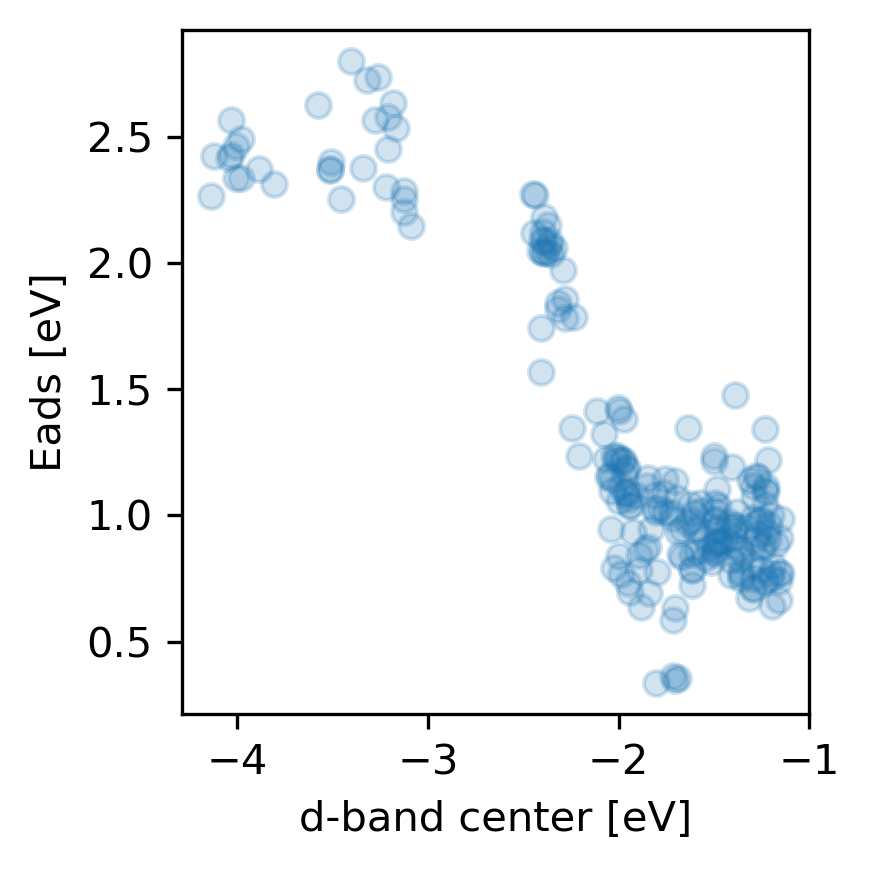

In [7]:
figsize = (3,3)
alpha = 0.2
fig, ax = plt.subplots(figsize=figsize)

ax.scatter(data_CO['epsilon_d_eV'], data_CO['E_ads_eV'], alpha=alpha)
ax.set_ylabel('Eads [eV]')
ax.set_xlabel('d-band center [eV]')
plt.tight_layout()
plt.savefig('fig1_Eads_vs_center.png', dpi=300)

# Training a univariate linear model
We now train a linear model and plot the results. 

Coefficients: 
 [[-0.70058302]]
Intercept: 
 [-0.08694612]
Root Mean squared error: 0.29
Mean absolute error: 0.22
Maximum Error: 0.65
Coefficient of determination: 0.77


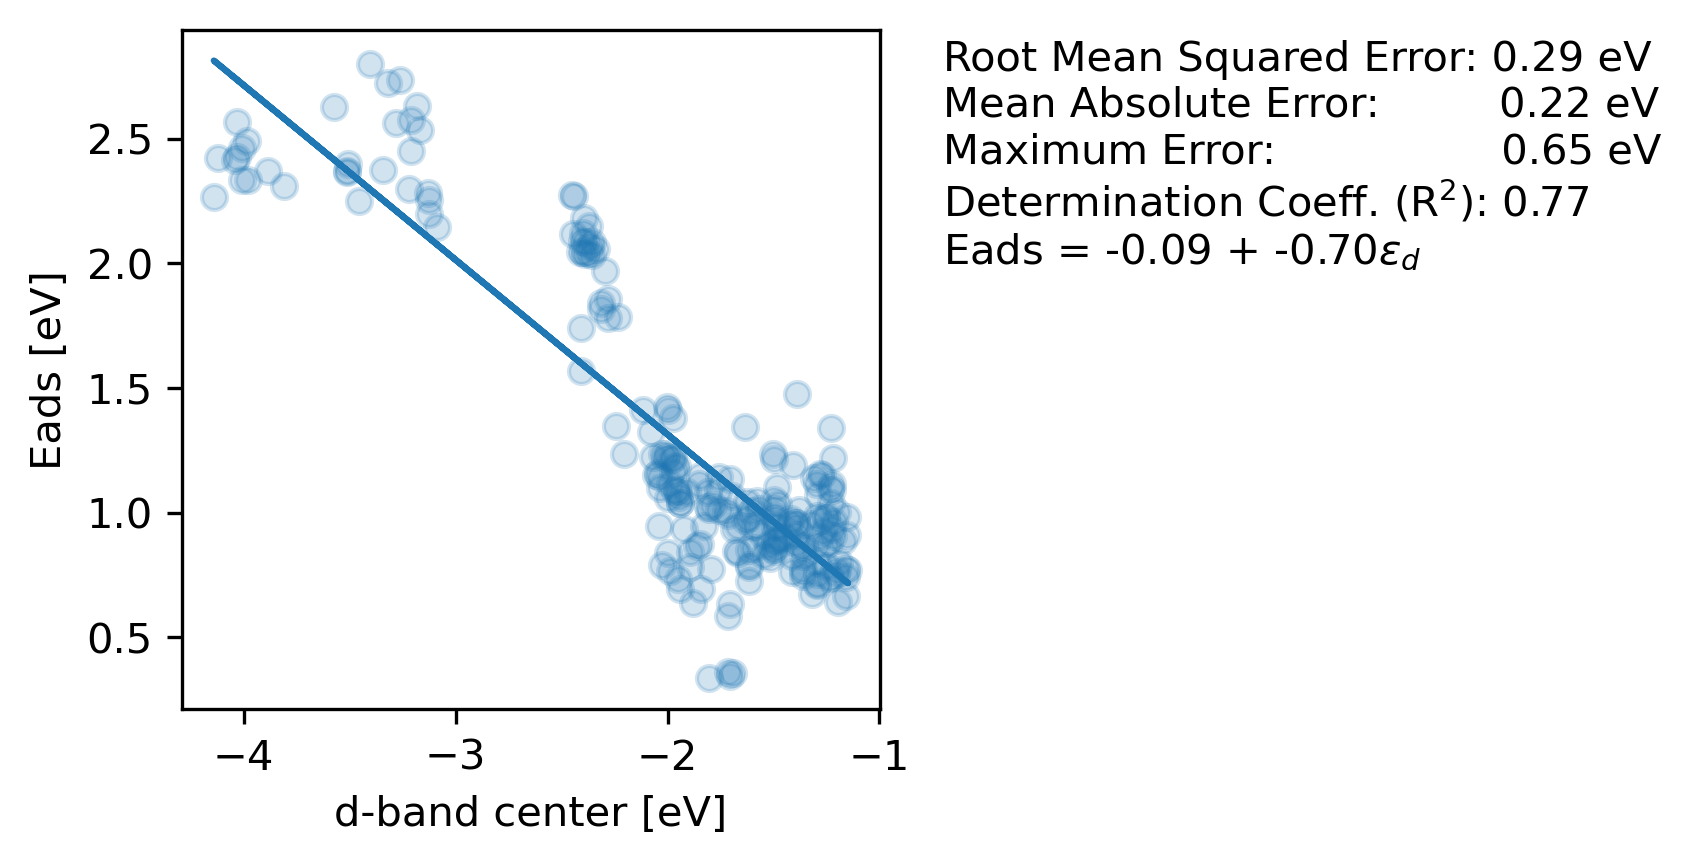

In [8]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

# Split the data into training/testing sets
X = data_CO['epsilon_d_eV'].to_numpy().reshape(-1,1)
Y = data_CO['E_ads_eV'].to_numpy().reshape(-1,1)

X_train, X_test = X, X
Y_train, Y_test = Y, Y

# Create linear regression object
regr = linear_model.LinearRegression(fit_intercept=True)

regr.fit(X_train,Y_train,)


# Make predictions using the testing set
Y_pred = regr.predict(X_test)


# The coefficients
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

# The root mean squared error
print('Root Mean squared error: %.2f'
      % mean_squared_error(Y_test, Y_pred, squared=False))

# The mean abosute error
print('Mean absolute error: %.2f'
      % mean_absolute_error(Y_test, Y_pred))

# Maximum Error
print('Maximum Error: %.2f'
      % max(Y_test - Y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, Y_pred))


# Plot outputs
fig, ax = plt.subplots(figsize=figsize)
ax.scatter(X_test, Y_test,alpha=alpha)
#ax.scatter(X_train, Y_train)
ax.plot(X_test, Y_pred, )

ax.set_ylabel('Eads [eV]')
ax.set_xlabel('d-band center [eV]')

s = 'Root Mean Squared Error: %.2f eV \n' % mean_squared_error(Y_test, Y_pred, squared=False) \
  + 'Mean Absolute Error:         %.2f eV \n'   % mean_absolute_error(Y_test, Y_pred) \
  + 'Maximum Error:                 %.2f eV \n' % max(Y_test - Y_pred) \
  + 'Determination Coeff. (R$^{2}$): %.2f \n' % r2_score(Y_test, Y_pred) \
  + 'Eads = %.2f + %.2f$\epsilon_d$' % (regr.intercept_, regr.coef_)


ax.text(x=-0.7,y=2.0,s=s)
plt.savefig('fig2_Eads_vs_eps_with_line.png', dpi=300,bbox_inches="tight")


# Creating train and test sets

Here we train the linear model again, but we train with a fraction of the data and test with the rest.

Coefficients: 
 [[-0.48143919]]
Intercept: 
 [0.6385425]
Root Mean squared error: 0.46
Mean absolute error: 0.42
Maximum Error: 1.17
Coefficient of determination: 0.22


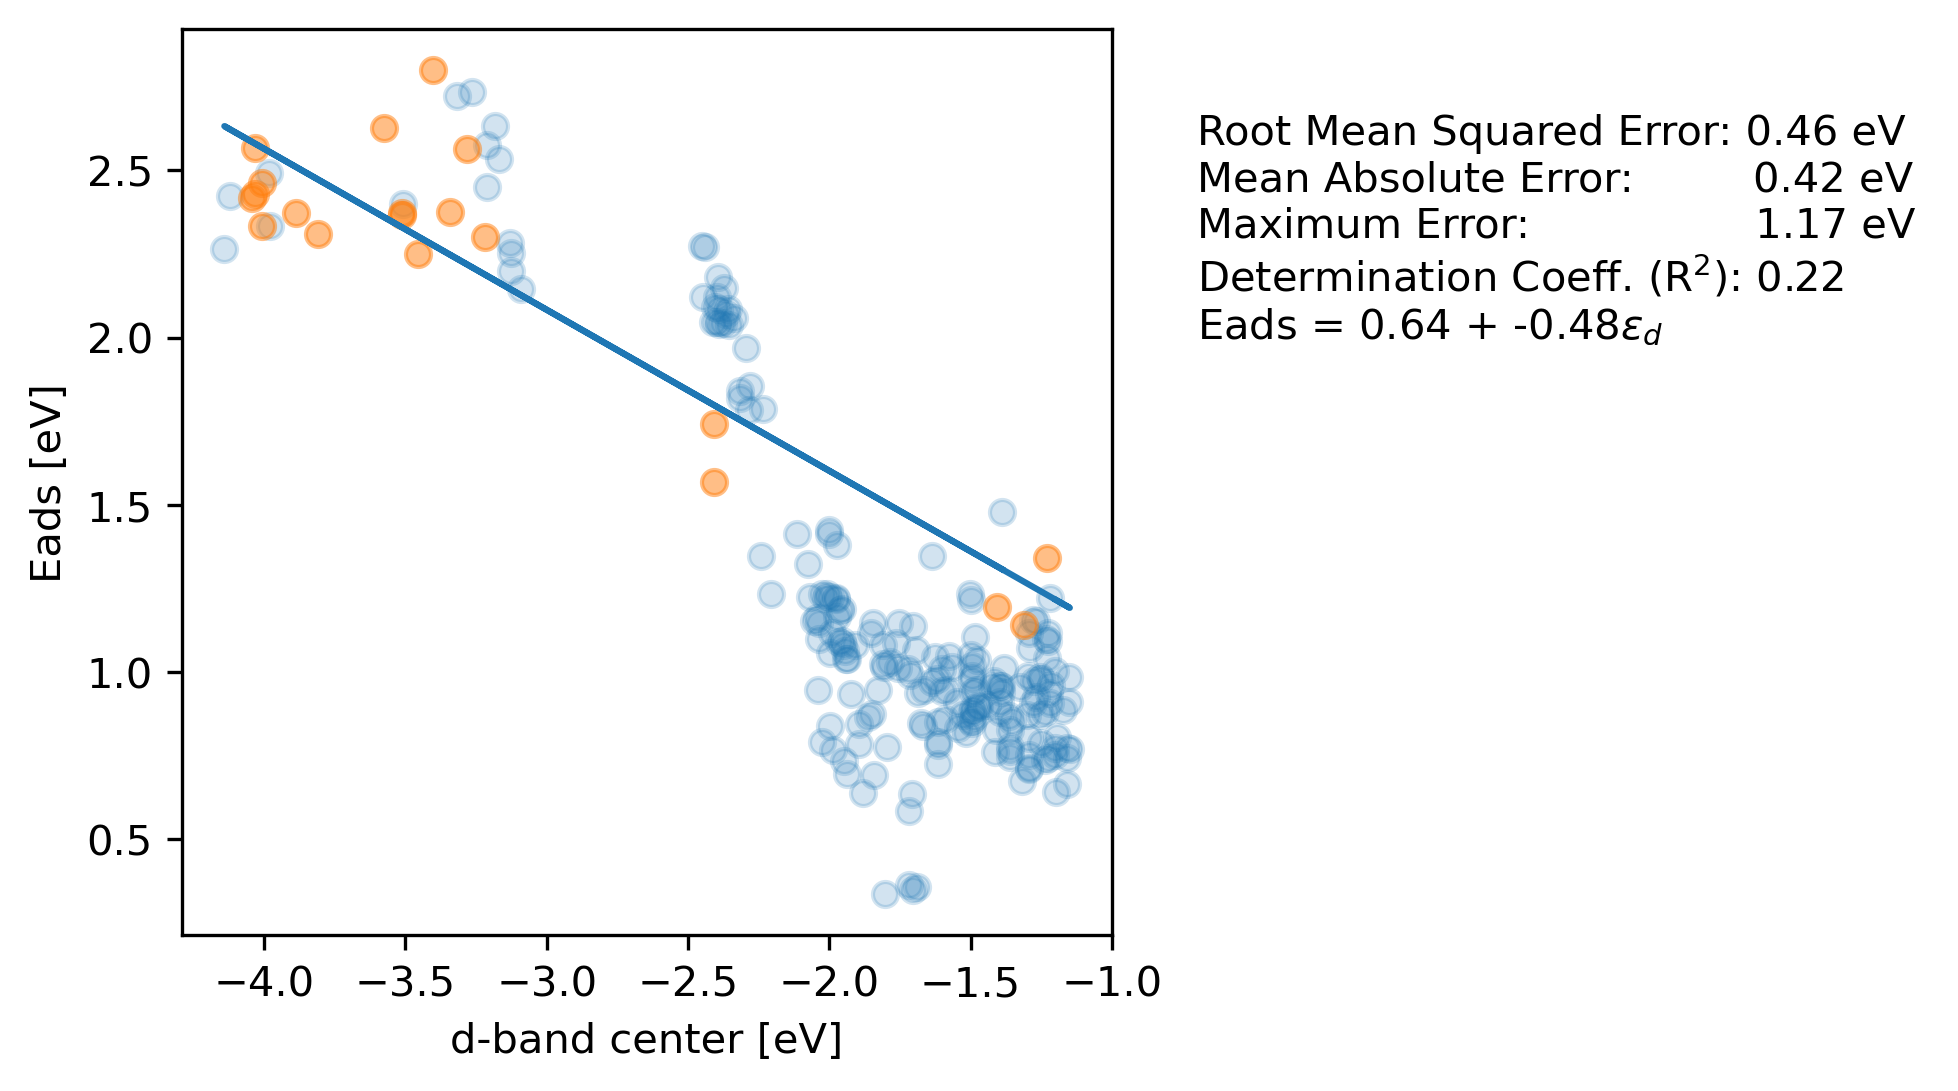

In [9]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


# Split the data into training/testing sets
X = data_CO['epsilon_d_eV'].to_numpy().reshape(-1,1)
Y = data_CO['E_ads_eV'].to_numpy().reshape(-1,1)

train_size = 20


X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

# Create linear regression object
regr = linear_model.LinearRegression()

regr.fit(X_train,Y_train)


# Make predictions using the testing set
Y_pred = regr.predict(X_test)


# The coefficients
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

# The root mean squared error
print('Root Mean squared error: %.2f'
      % mean_squared_error(Y_test, Y_pred, squared=False))
# The mean squared error
print('Mean absolute error: %.2f'
      % mean_absolute_error(Y_test, Y_pred))

# Maximum Error
print('Maximum Error: %.2f'
      % max(abs(Y_test - Y_pred)))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, Y_pred))

# Plot outputs
figsize = (4,4)
fig, ax = plt.subplots(figsize=figsize)
ax.scatter(X_test, Y_test,alpha=alpha)
ax.scatter(X_train, Y_train,alpha=0.5,)
ax.plot(X_test, Y_pred, )


ax.set_ylabel('Eads [eV]')
ax.set_xlabel('d-band center [eV]')

s = 'Root Mean Squared Error: %.2f eV \n' % mean_squared_error(Y_test, Y_pred, squared=False) \
  + 'Mean Absolute Error:         %.2f eV \n'   % mean_absolute_error(Y_test, Y_pred) \
  + 'Maximum Error:                 %.2f eV \n' % max(abs(Y_test - Y_pred)) \
  + 'Determination Coeff. (R$^{2}$): %.2f \n' % r2_score(Y_test, Y_pred) \
  + 'Eads = %.2f + %.2f$\epsilon_d$' % (regr.intercept_, regr.coef_)

ax.text(x=-0.7,y=2.0,s=s)

plt.savefig('fig3_bad_training_set.png', dpi=300,bbox_inches='tight')
plt.show()


The train_test_split function can select samples randomly, which is recommended.

size traininig set: 44
size test set: 176
Coefficients: 
 [[-0.70179952]]
Intercept: 
 [-0.12403414]
Root Mean squared error: 0.30
Mean absolute error: 0.22
Maximum Error: 0.81
Coefficient of determination: 0.76


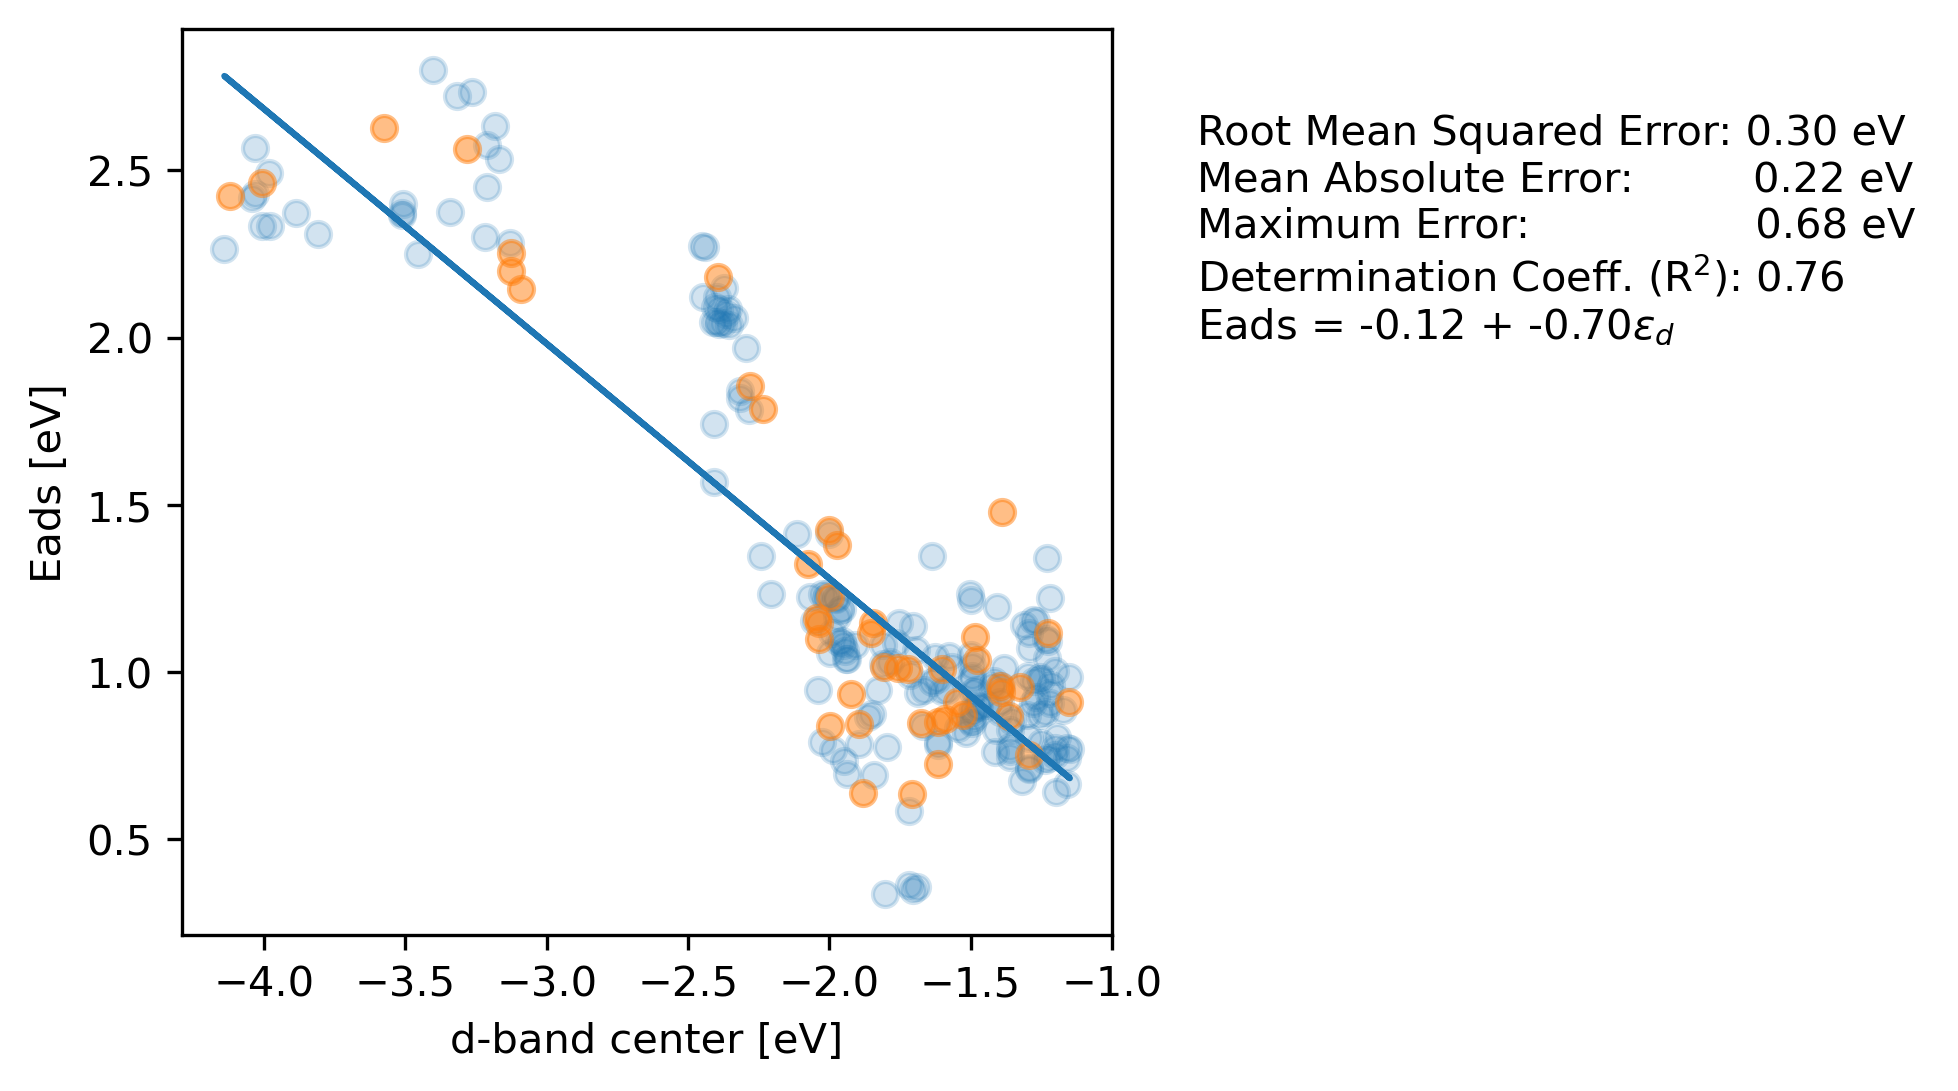

In [10]:
from sklearn.model_selection import train_test_split

# Split the data into training/testing sets

train, test = train_test_split(data_CO, train_size = 0.2, test_size=0.8, random_state =1)
print ('size traininig set:', len(train))
print ('size test set:', len(test))

X_train = train['epsilon_d_eV'].to_numpy().reshape(-1,1)
Y_train = train['E_ads_eV'].to_numpy().reshape(-1,1)

X_test = test['epsilon_d_eV'].to_numpy().reshape(-1,1)
Y_test = test['E_ads_eV'].to_numpy().reshape(-1,1)


# Create linear regression object
regr = linear_model.LinearRegression()

regr.fit(X_train,Y_train)


# Make predictions using the testing set
Y_pred = regr.predict(X_test)


# The coefficients
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

# The root mean squared error
print('Root Mean squared error: %.2f'
      % mean_squared_error(Y_test, Y_pred, squared=False))
# The mean squared error
print('Mean absolute error: %.2f'
      % mean_absolute_error(Y_test, Y_pred))

# Maximum Error
print('Maximum Error: %.2f'
      % max(abs(Y_test - Y_pred)))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, Y_pred))

# Plot outputs

fig, ax = plt.subplots(figsize=figsize)
ax.scatter(X_test, Y_test,alpha=alpha)
ax.scatter(X_train, Y_train,alpha=0.5,)
ax.plot(X_test, Y_pred, )


ax.set_ylabel('Eads [eV]')
ax.set_xlabel('d-band center [eV]')


s = 'Root Mean Squared Error: %.2f eV \n' % mean_squared_error(Y_test, Y_pred, squared=False) \
  + 'Mean Absolute Error:         %.2f eV \n'   % mean_absolute_error(Y_test, Y_pred) \
  + 'Maximum Error:                 %.2f eV \n' % max(Y_test - Y_pred) \
  + 'Determination Coeff. (R$^{2}$): %.2f \n' % r2_score(Y_test, Y_pred) \
  + 'Eads = %.2f + %.2f$\epsilon_d$' % (regr.intercept_, regr.coef_)

ax.text(x=-0.7,y=2.0,s=s)
plt.savefig('fig4_better_training_set.png', dpi=300,bbox_inches='tight')
plt.show()

# Cross-validation

Errors are sensitive to choice of points (corresponding to different random state initializations).

size traininig set: 22
size test set: 22
Coefficients: 
 [[-0.79884561]]
Intercept: 
 [-0.25001433]
Root Mean squared error: 0.22
Mean absolute error: 0.17
Maximum Error: 0.60
Coefficient of determination: 0.82


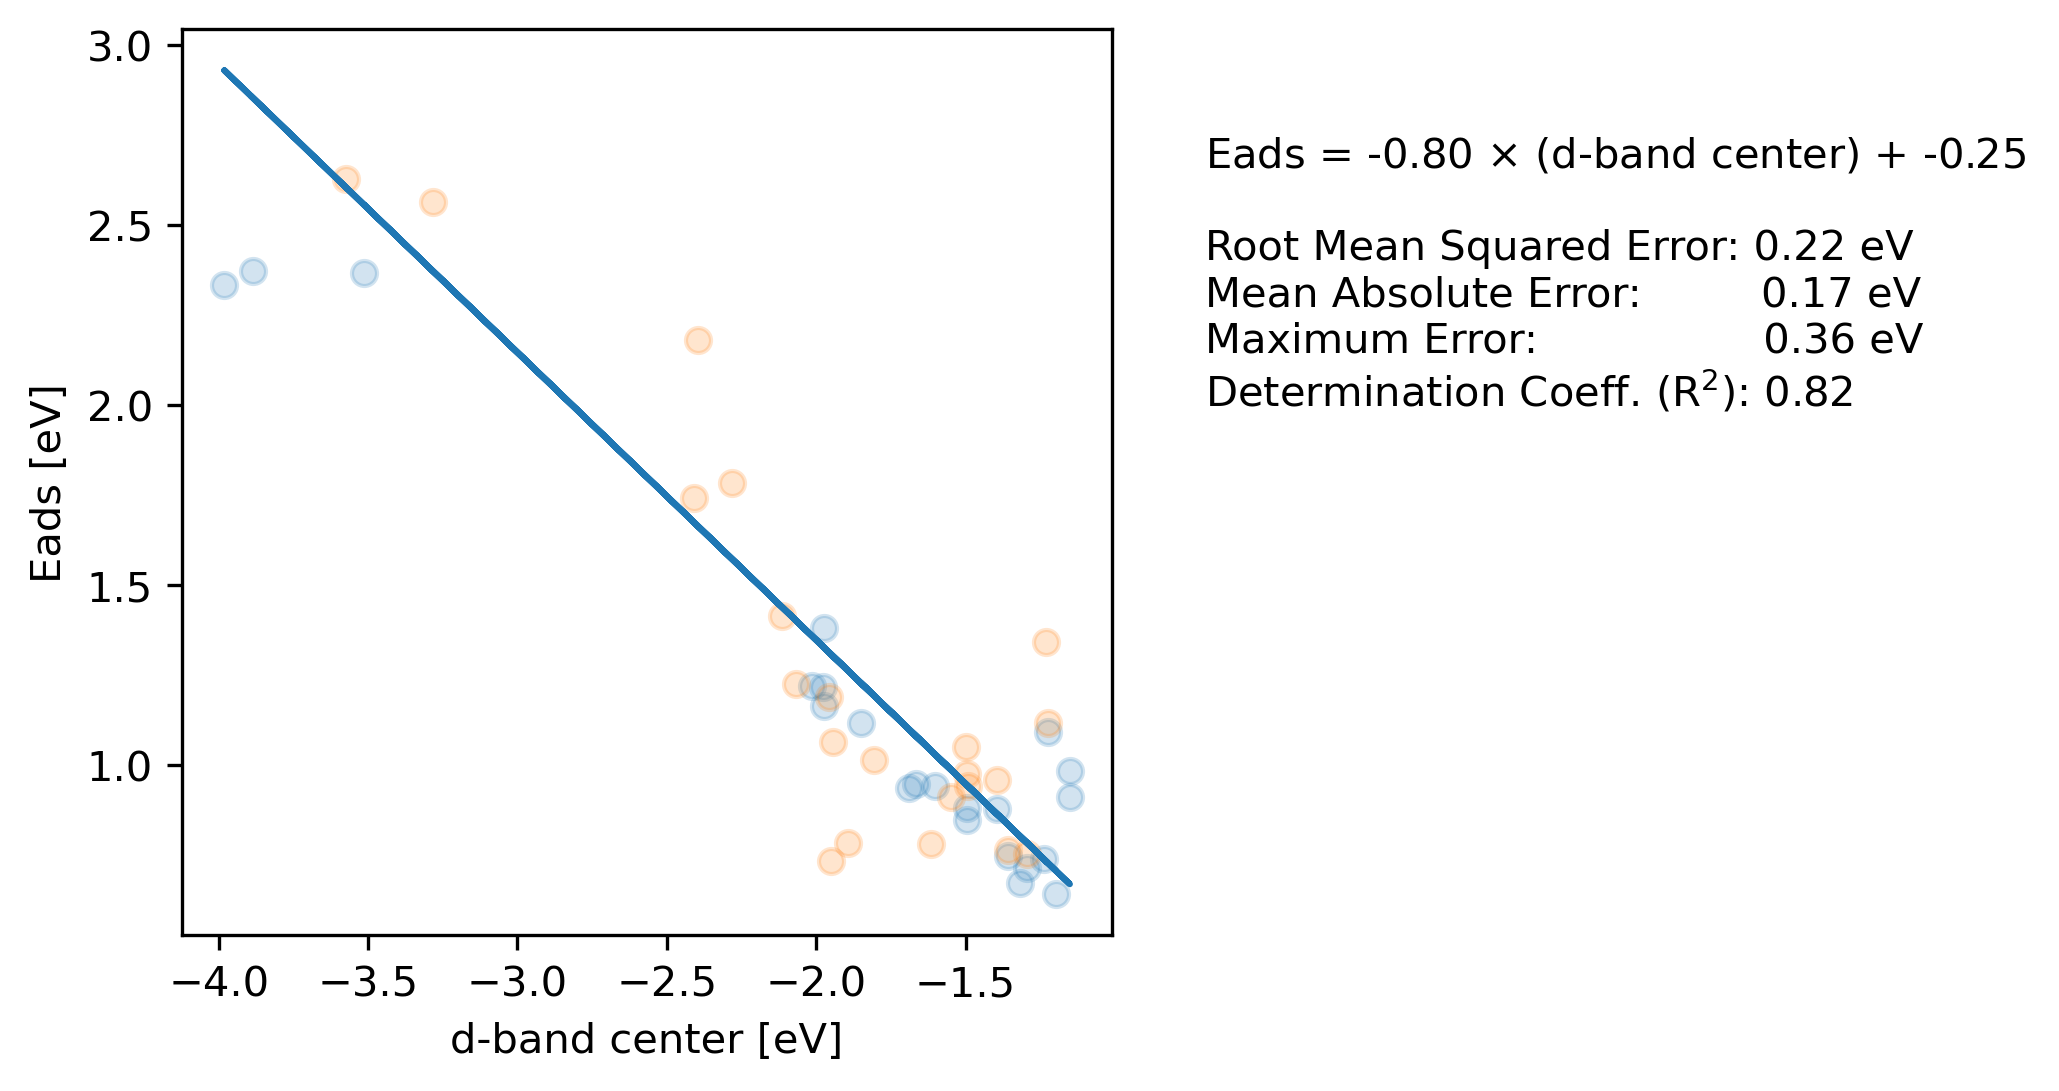

size traininig set: 22
size test set: 22
Coefficients: 
 [[-0.72863373]]
Intercept: 
 [0.02800207]
Root Mean squared error: 0.30
Mean absolute error: 0.24
Maximum Error: 0.71
Coefficient of determination: 0.63


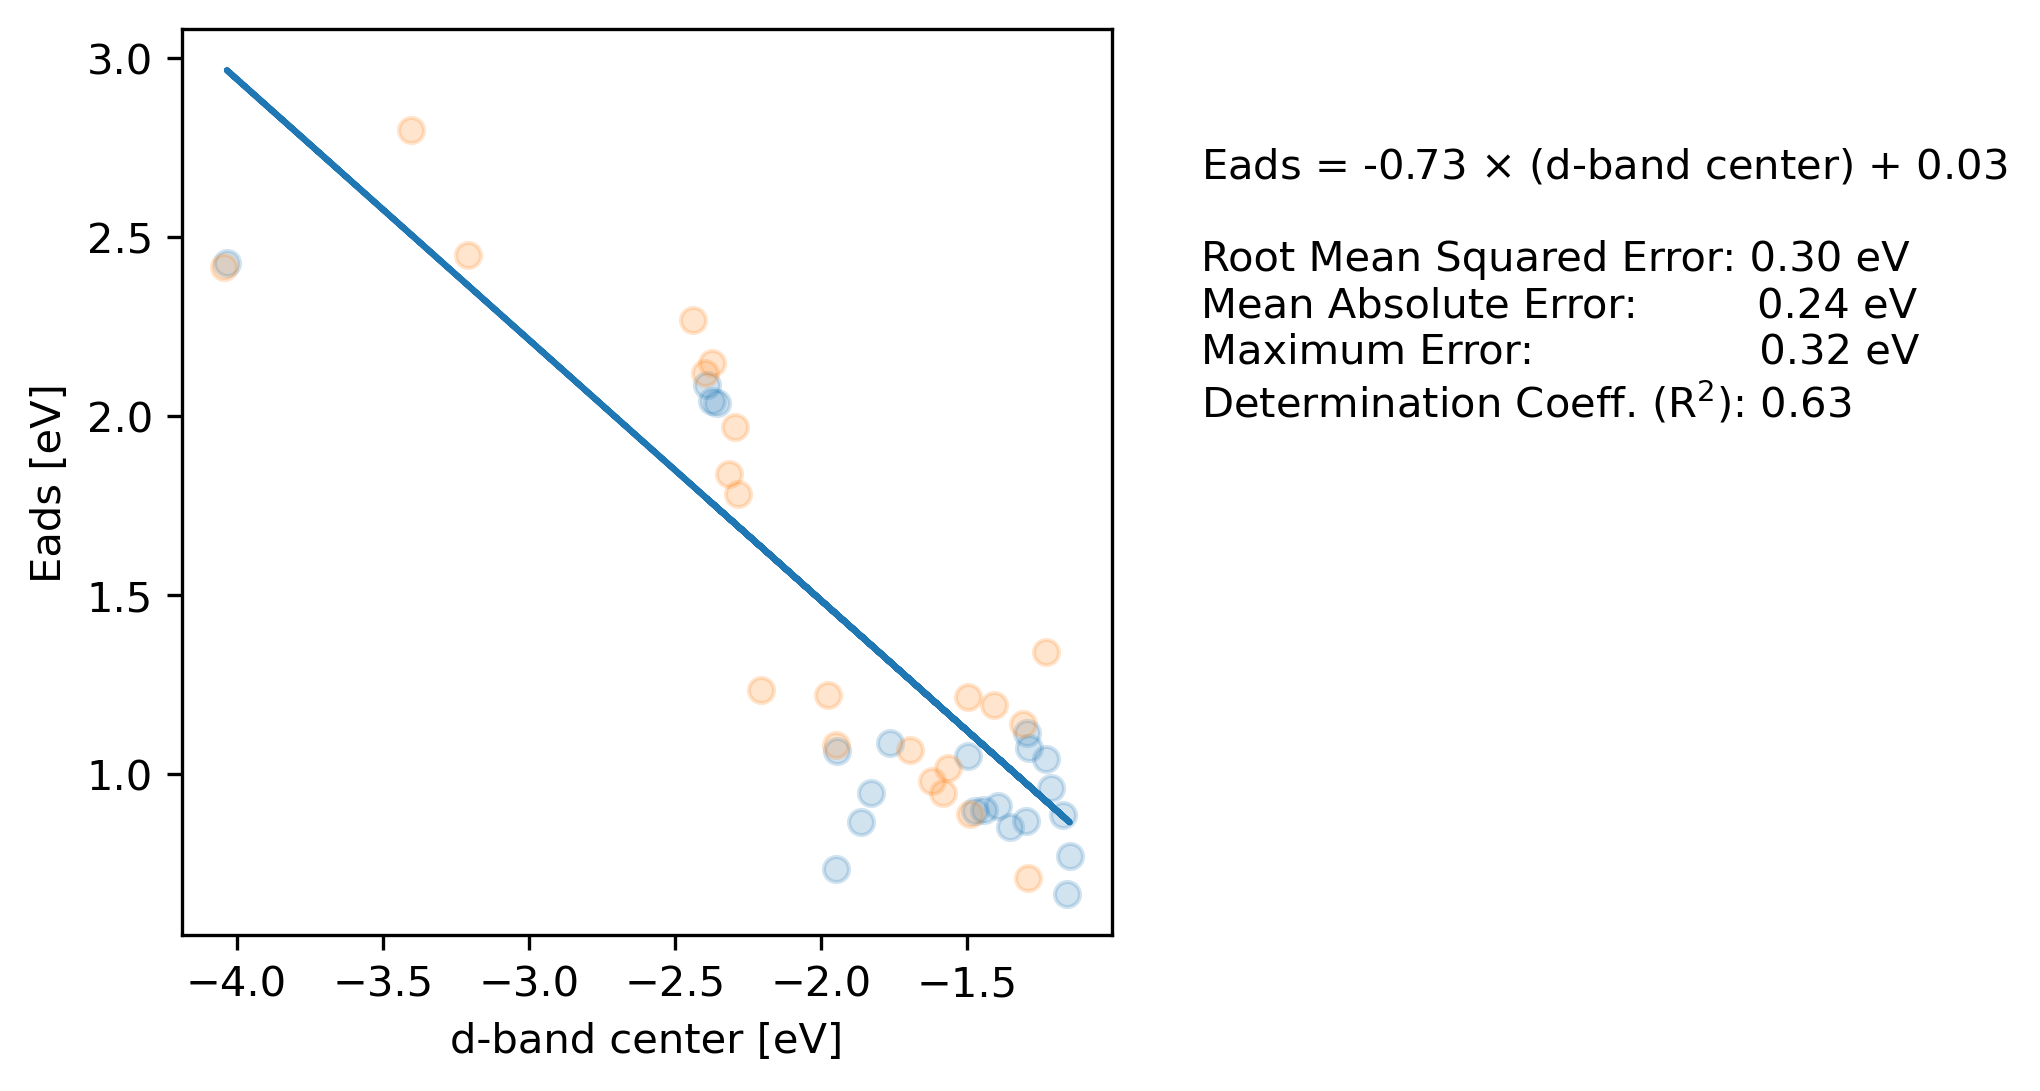

size traininig set: 22
size test set: 22
Coefficients: 
 [[-0.62406667]]
Intercept: 
 [0.1691737]
Root Mean squared error: 0.38
Mean absolute error: 0.31
Maximum Error: 0.88
Coefficient of determination: 0.69


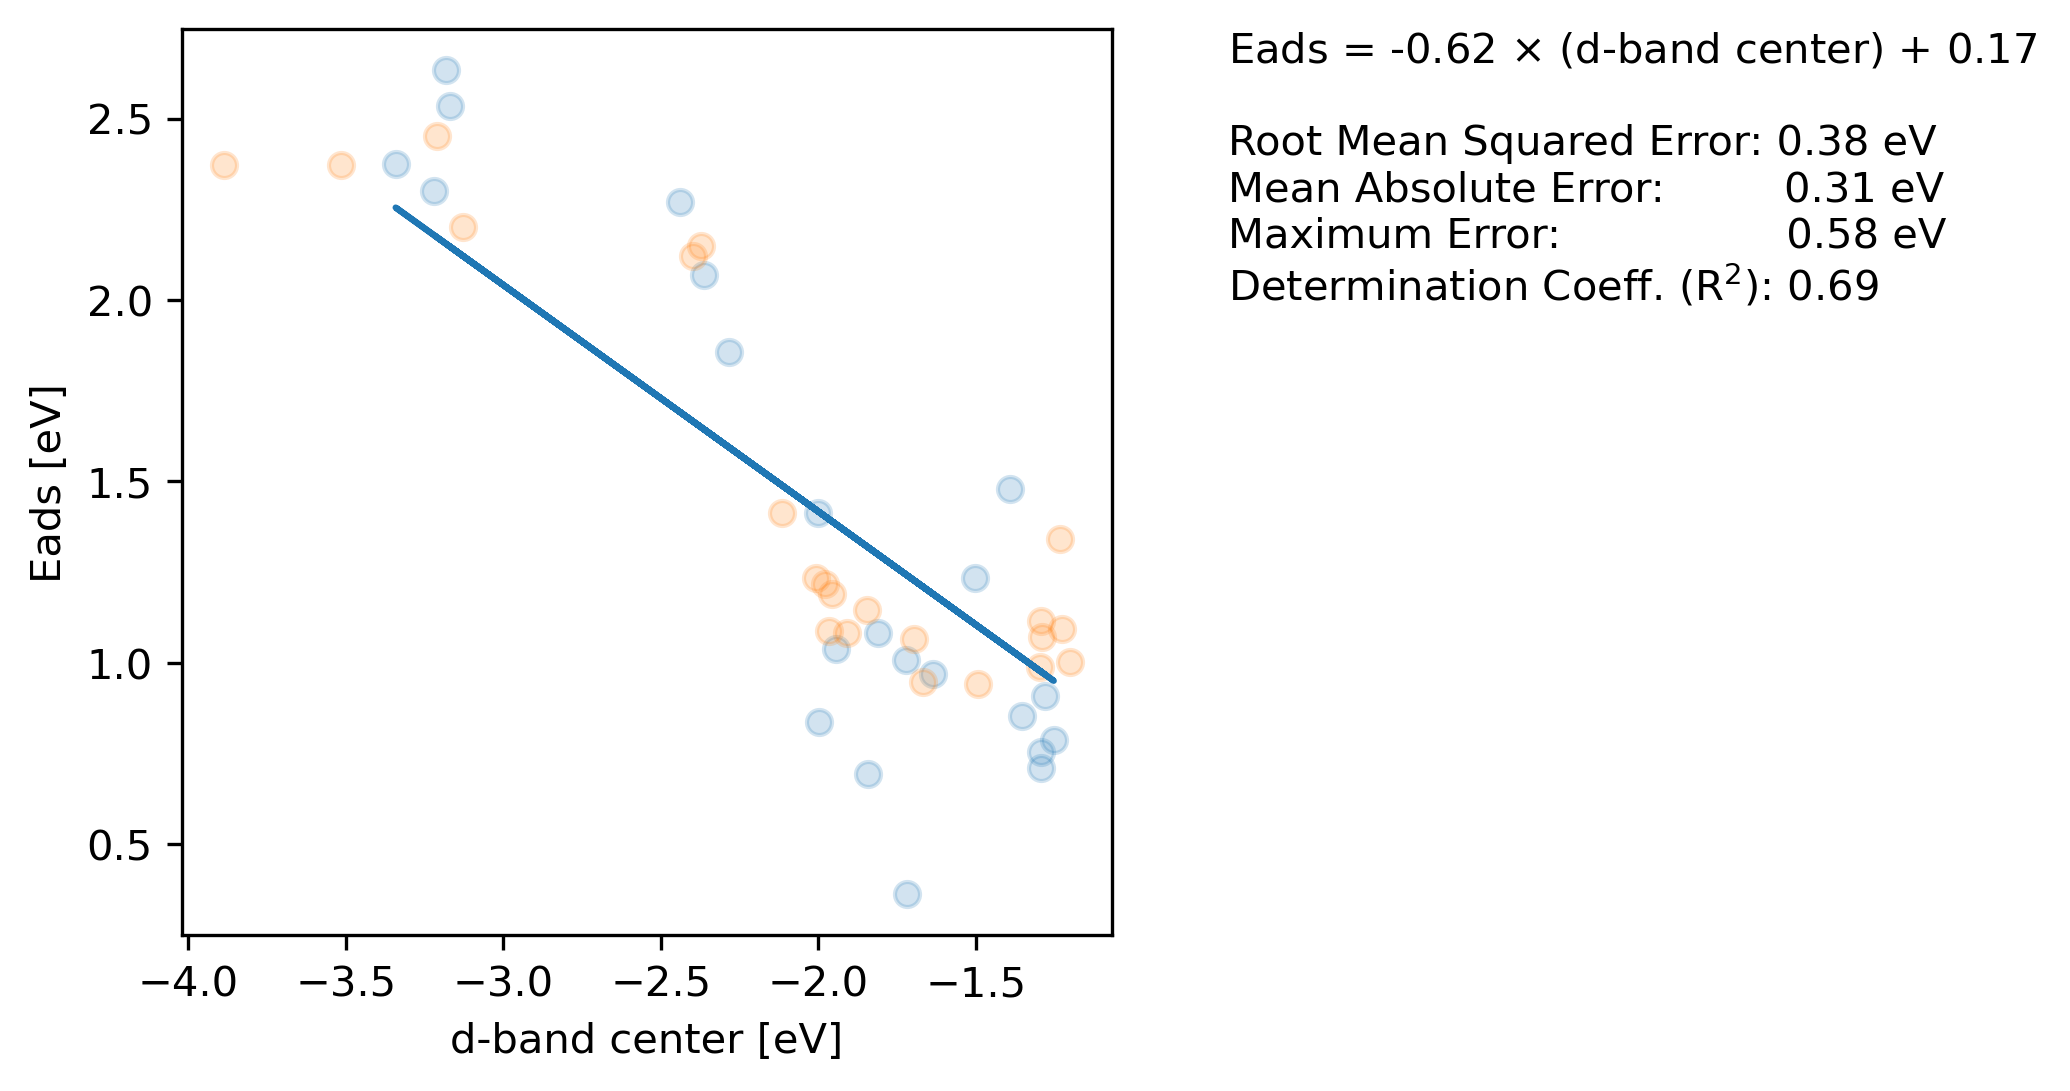

size traininig set: 22
size test set: 22
Coefficients: 
 [[-0.67794798]]
Intercept: 
 [-0.06180312]
Root Mean squared error: 0.33
Mean absolute error: 0.24
Maximum Error: 0.83
Coefficient of determination: 0.57


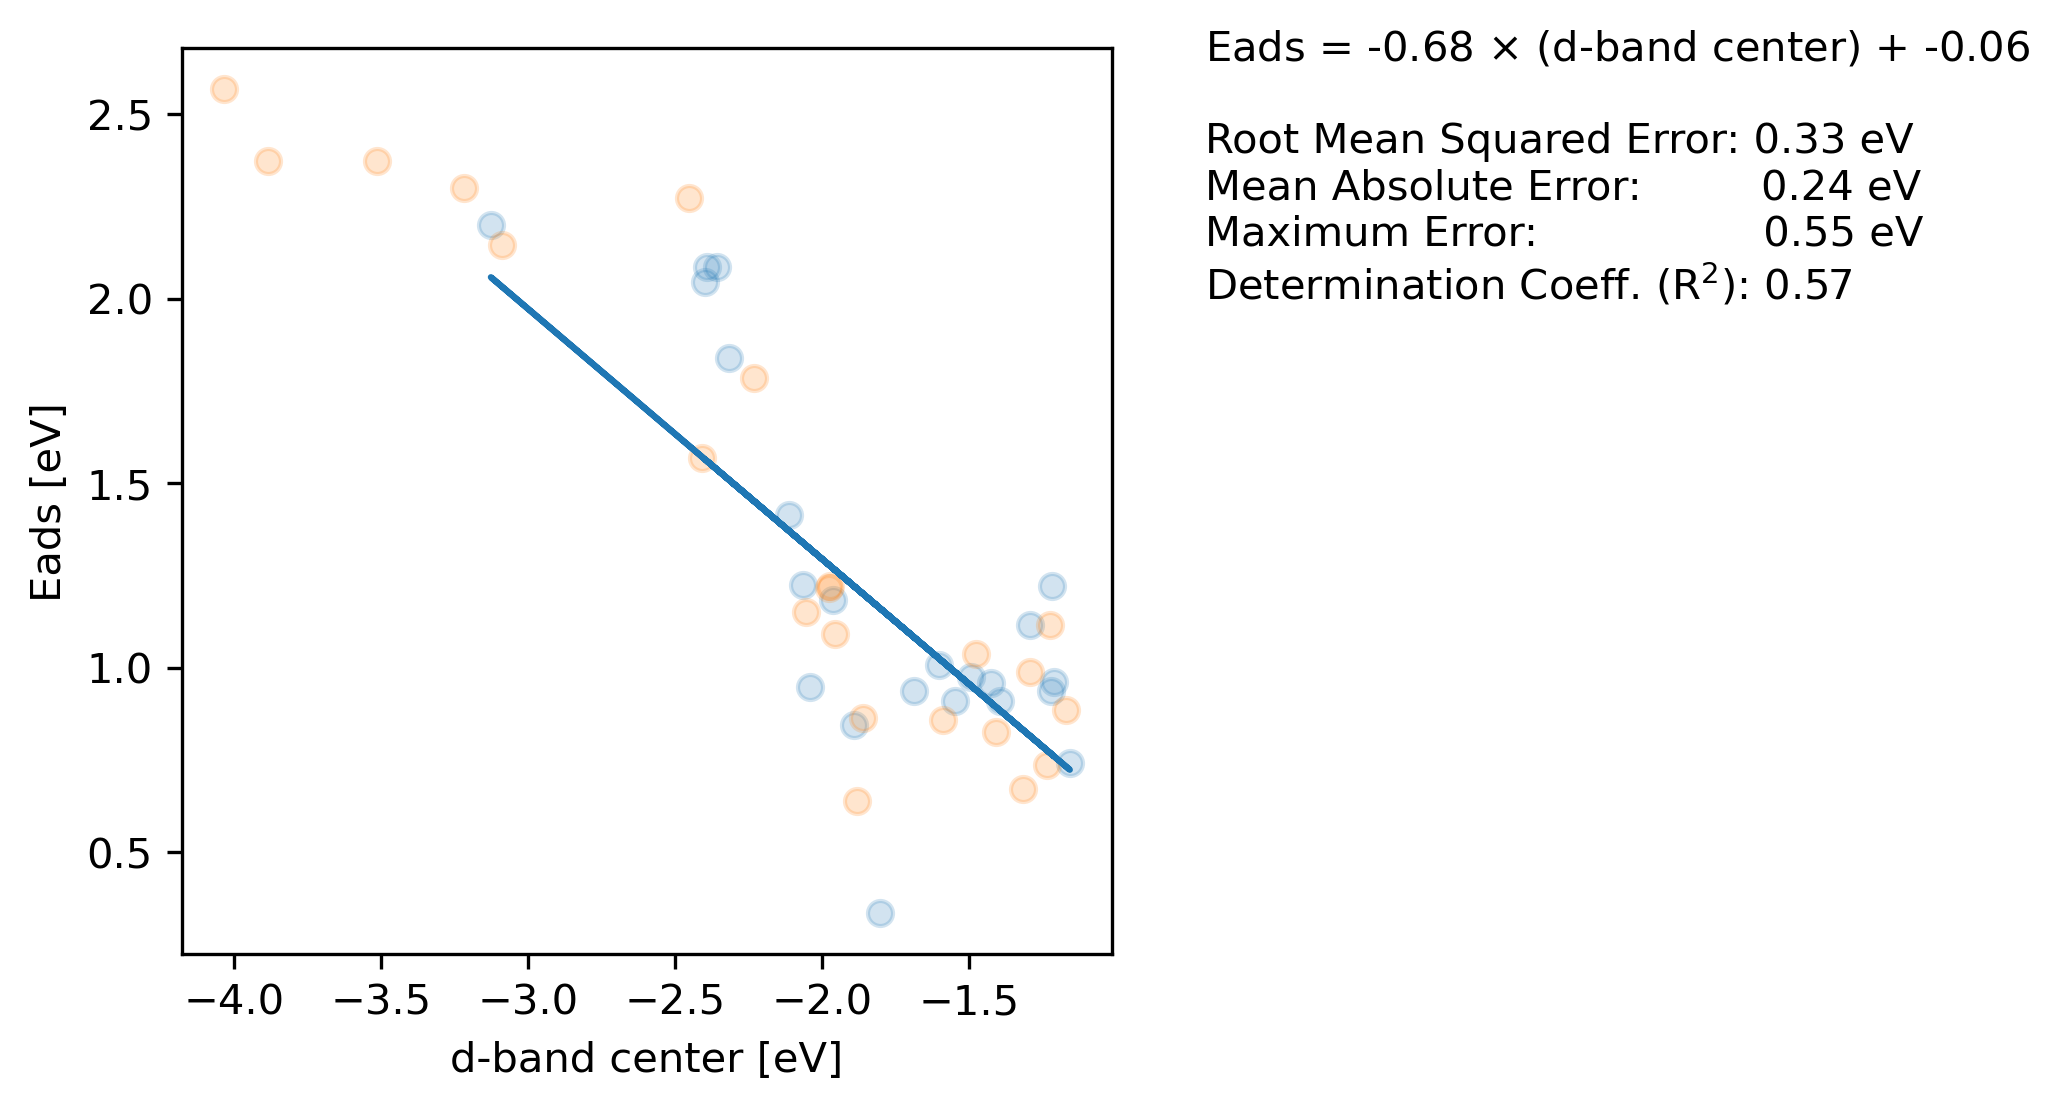

size traininig set: 22
size test set: 22
Coefficients: 
 [[-0.6973445]]
Intercept: 
 [-0.15574343]
Root Mean squared error: 0.31
Mean absolute error: 0.25
Maximum Error: 0.64
Coefficient of determination: 0.68


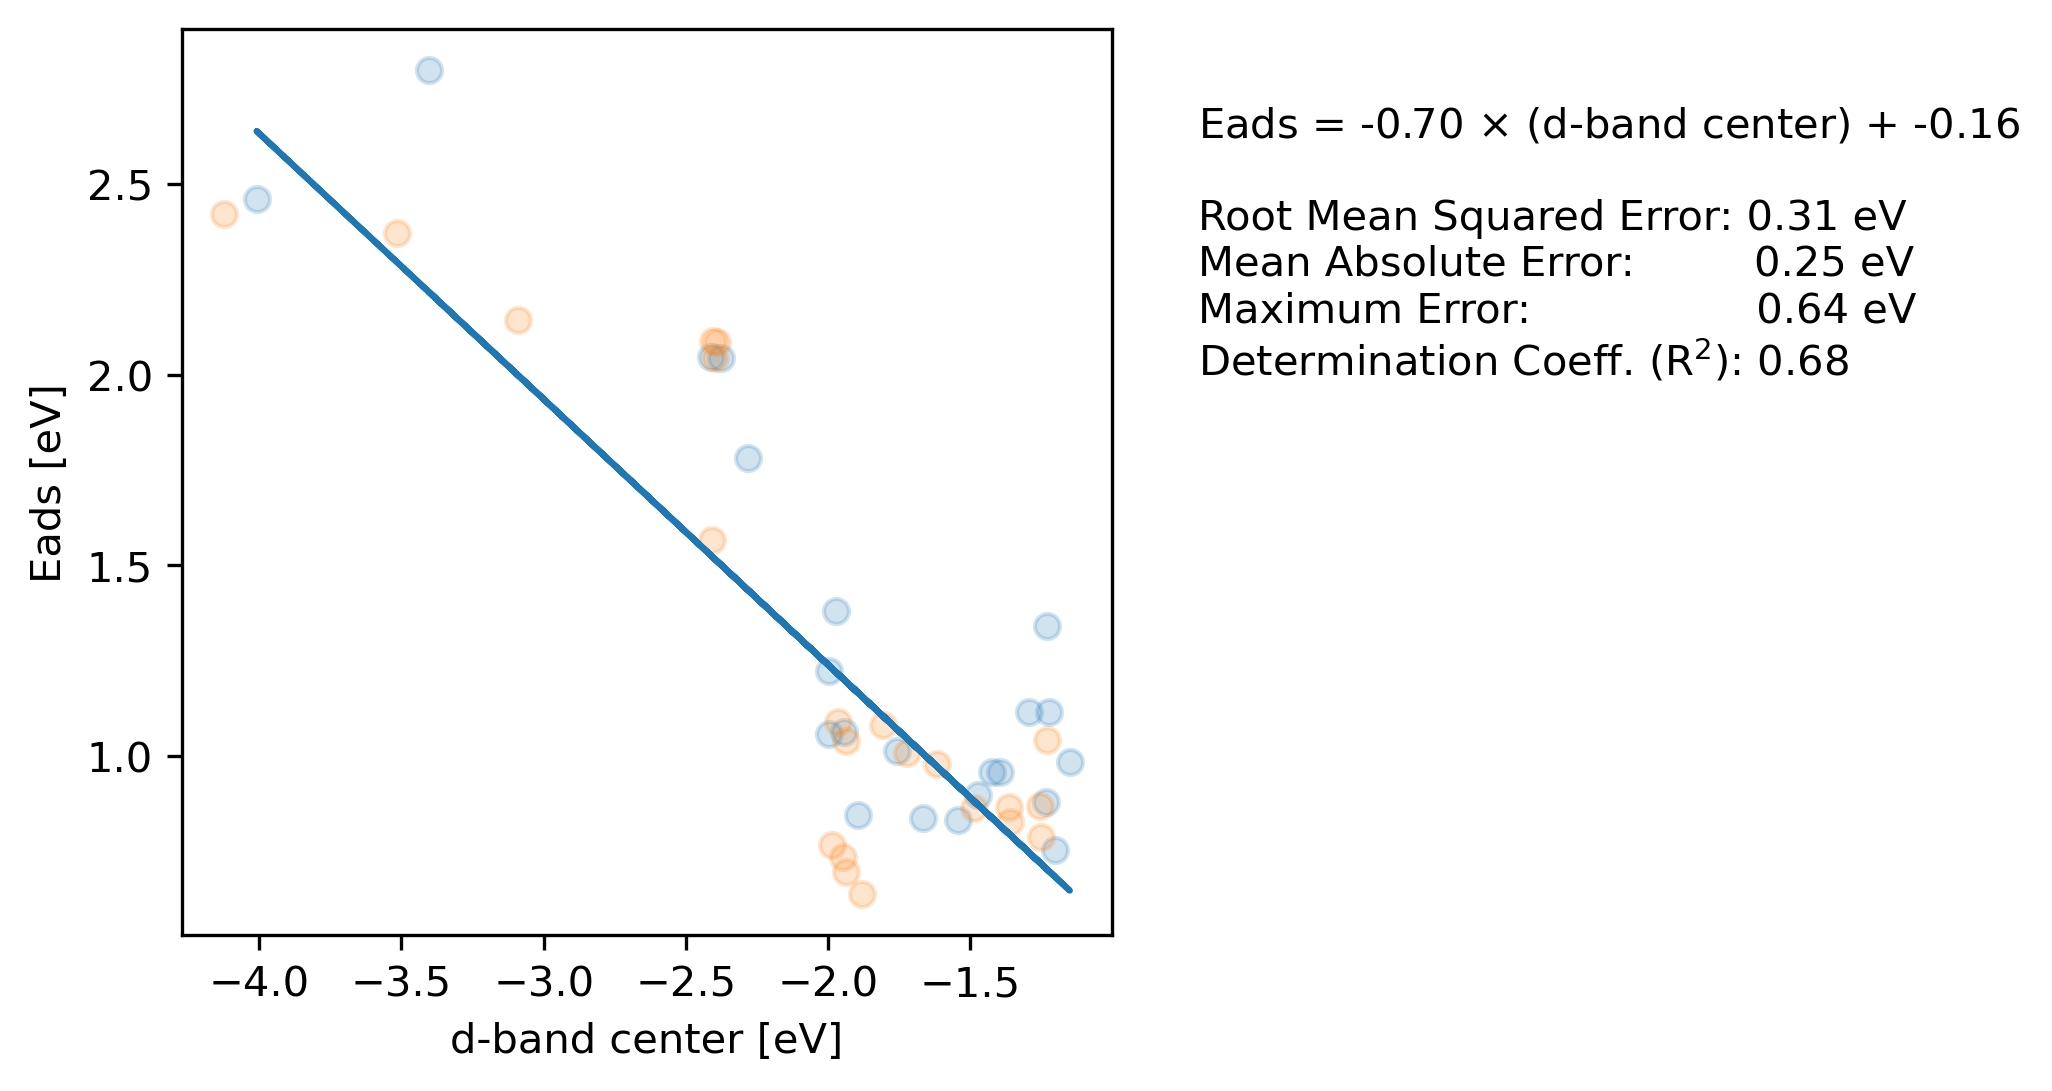

size traininig set: 22
size test set: 22
Coefficients: 
 [[-0.63043763]]
Intercept: 
 [-0.0178508]
Root Mean squared error: 0.26
Mean absolute error: 0.19
Maximum Error: 0.69
Coefficient of determination: 0.83


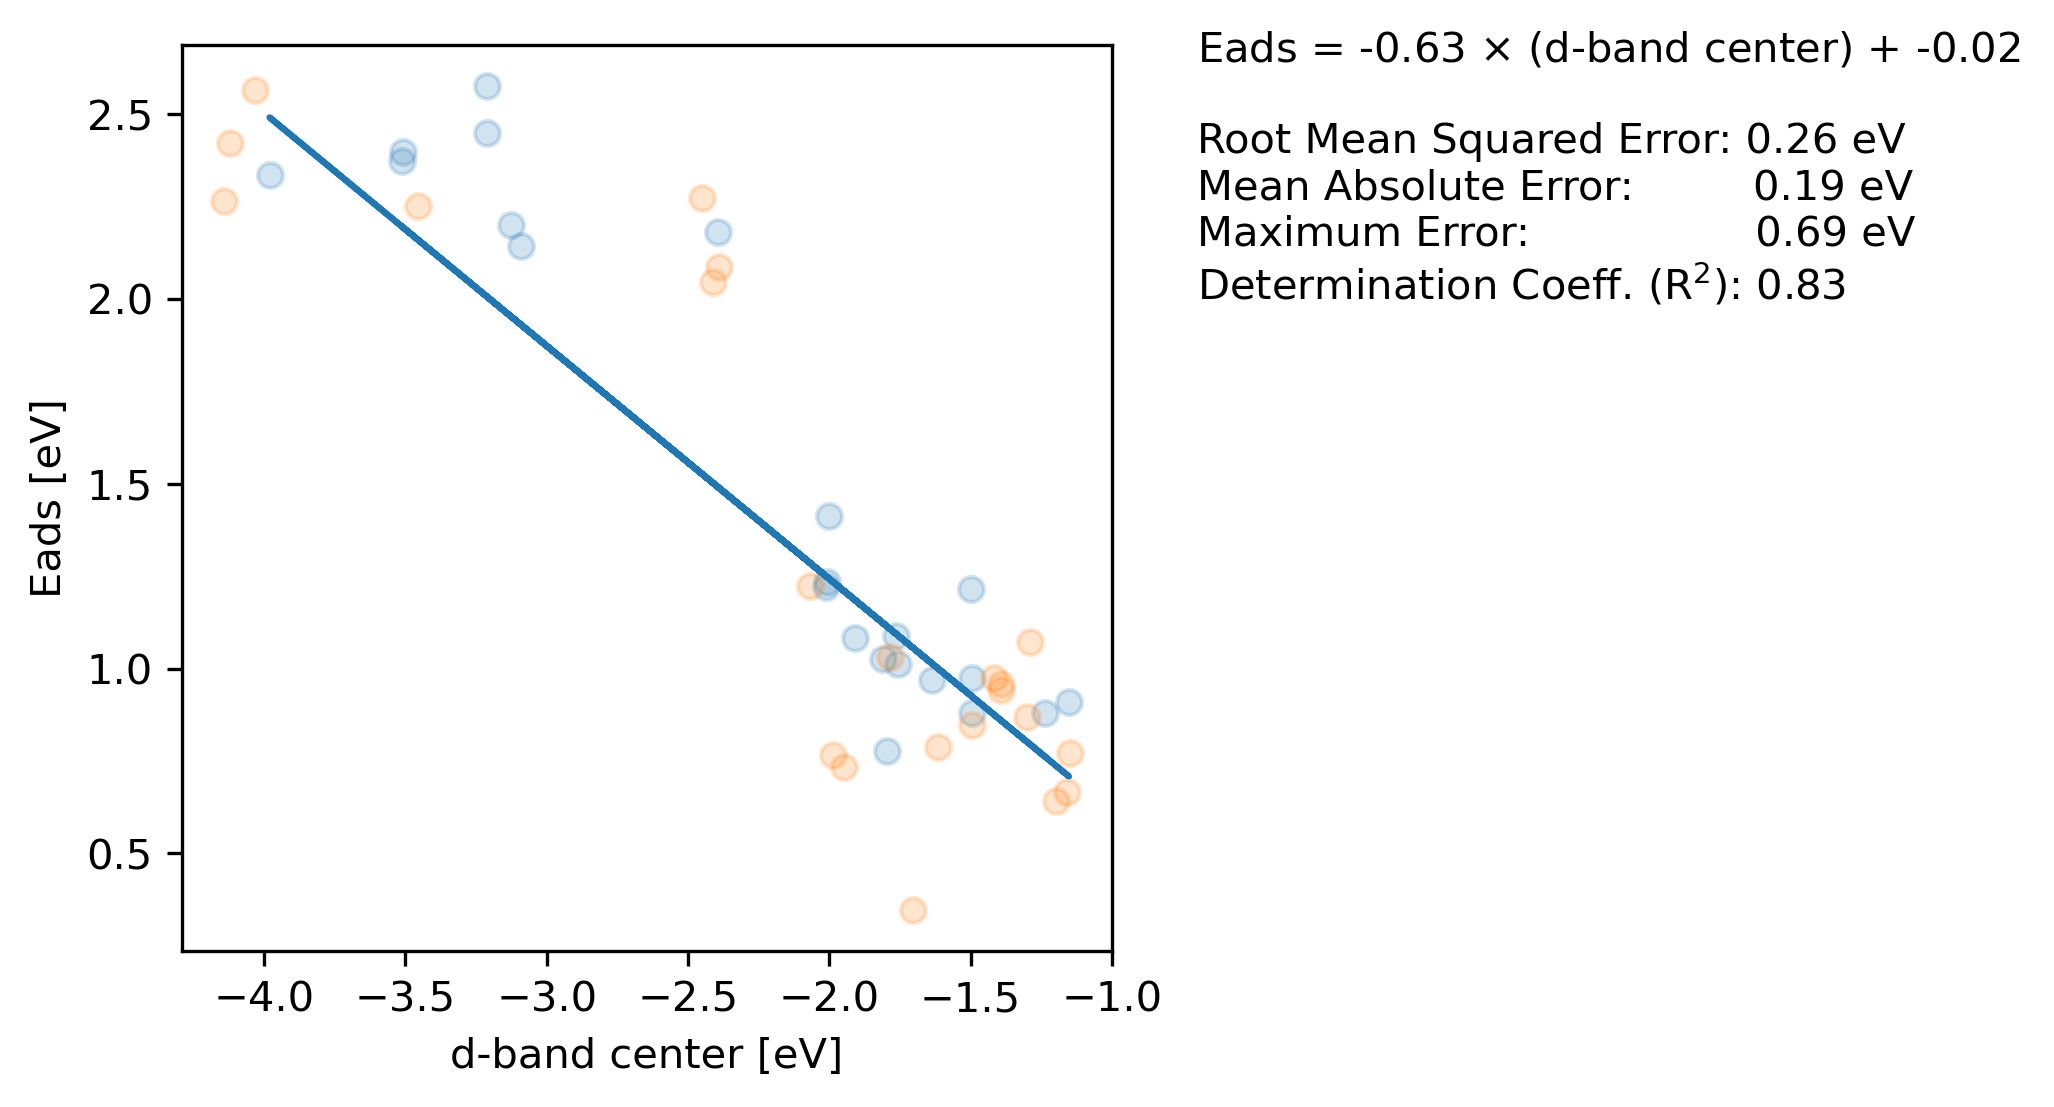

size traininig set: 22
size test set: 22
Coefficients: 
 [[-0.57175882]]
Intercept: 
 [0.07776124]
Root Mean squared error: 0.27
Mean absolute error: 0.19
Maximum Error: 0.77
Coefficient of determination: 0.81


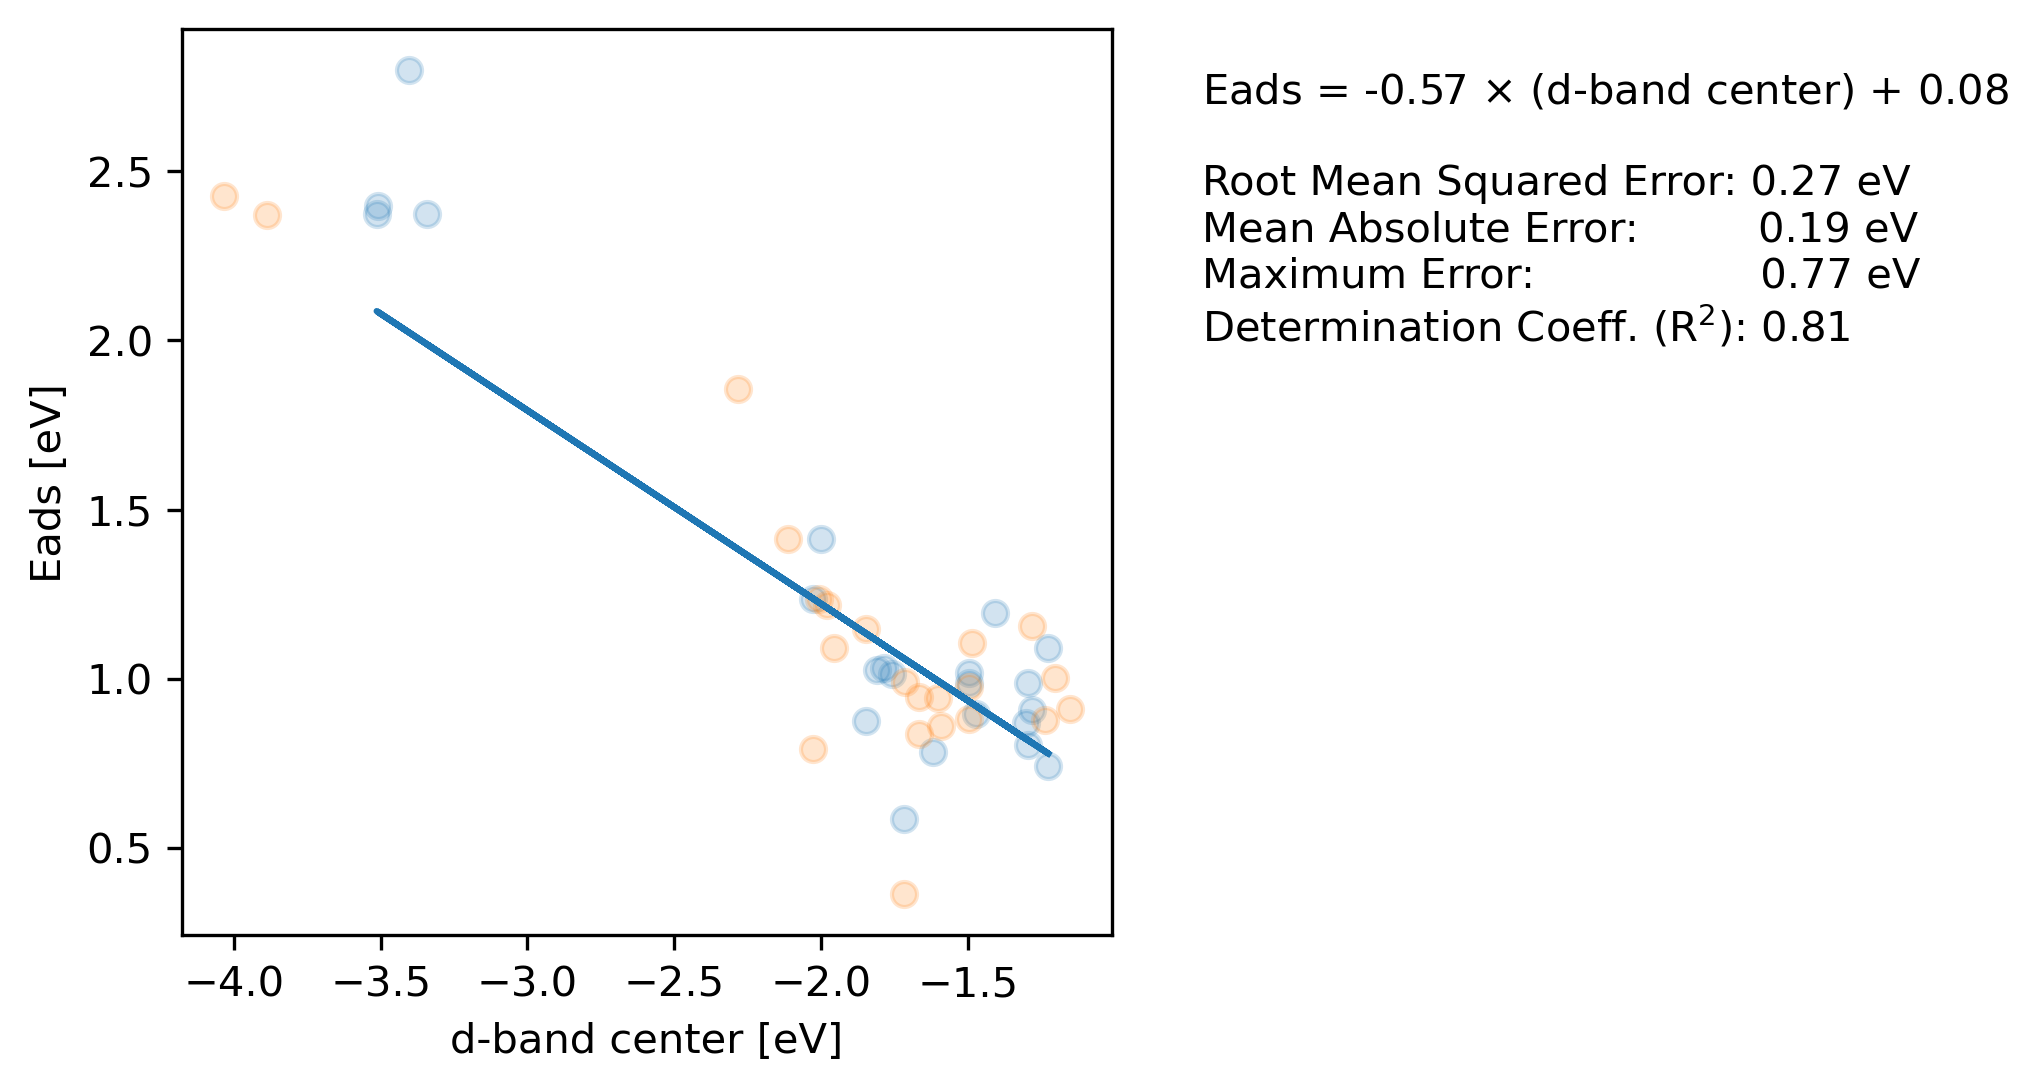

size traininig set: 22
size test set: 22
Coefficients: 
 [[-0.53066453]]
Intercept: 
 [0.12837389]
Root Mean squared error: 0.38
Mean absolute error: 0.26
Maximum Error: 0.86
Coefficient of determination: 0.69


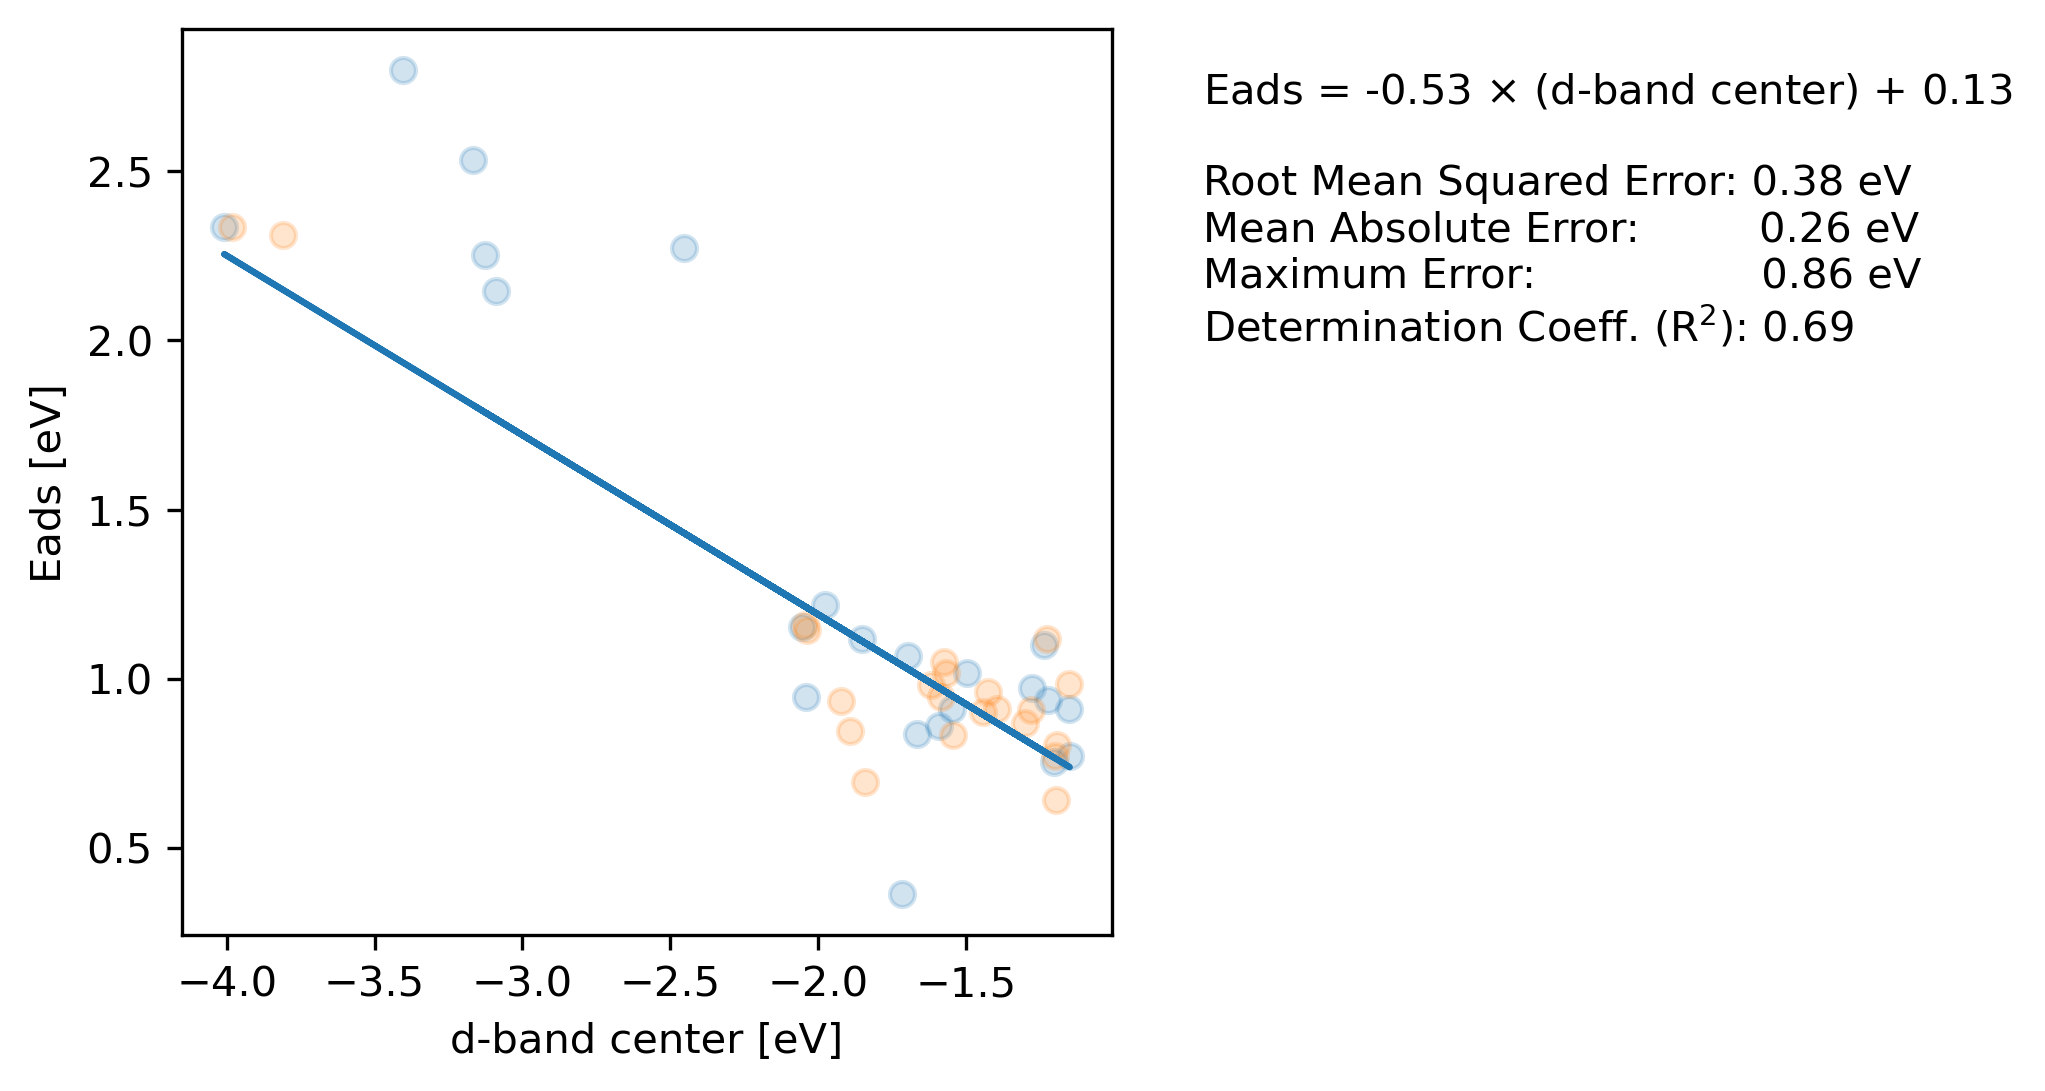

size traininig set: 22
size test set: 22
Coefficients: 
 [[-0.67218088]]
Intercept: 
 [-0.05665419]
Root Mean squared error: 0.28
Mean absolute error: 0.21
Maximum Error: 0.82
Coefficient of determination: 0.78


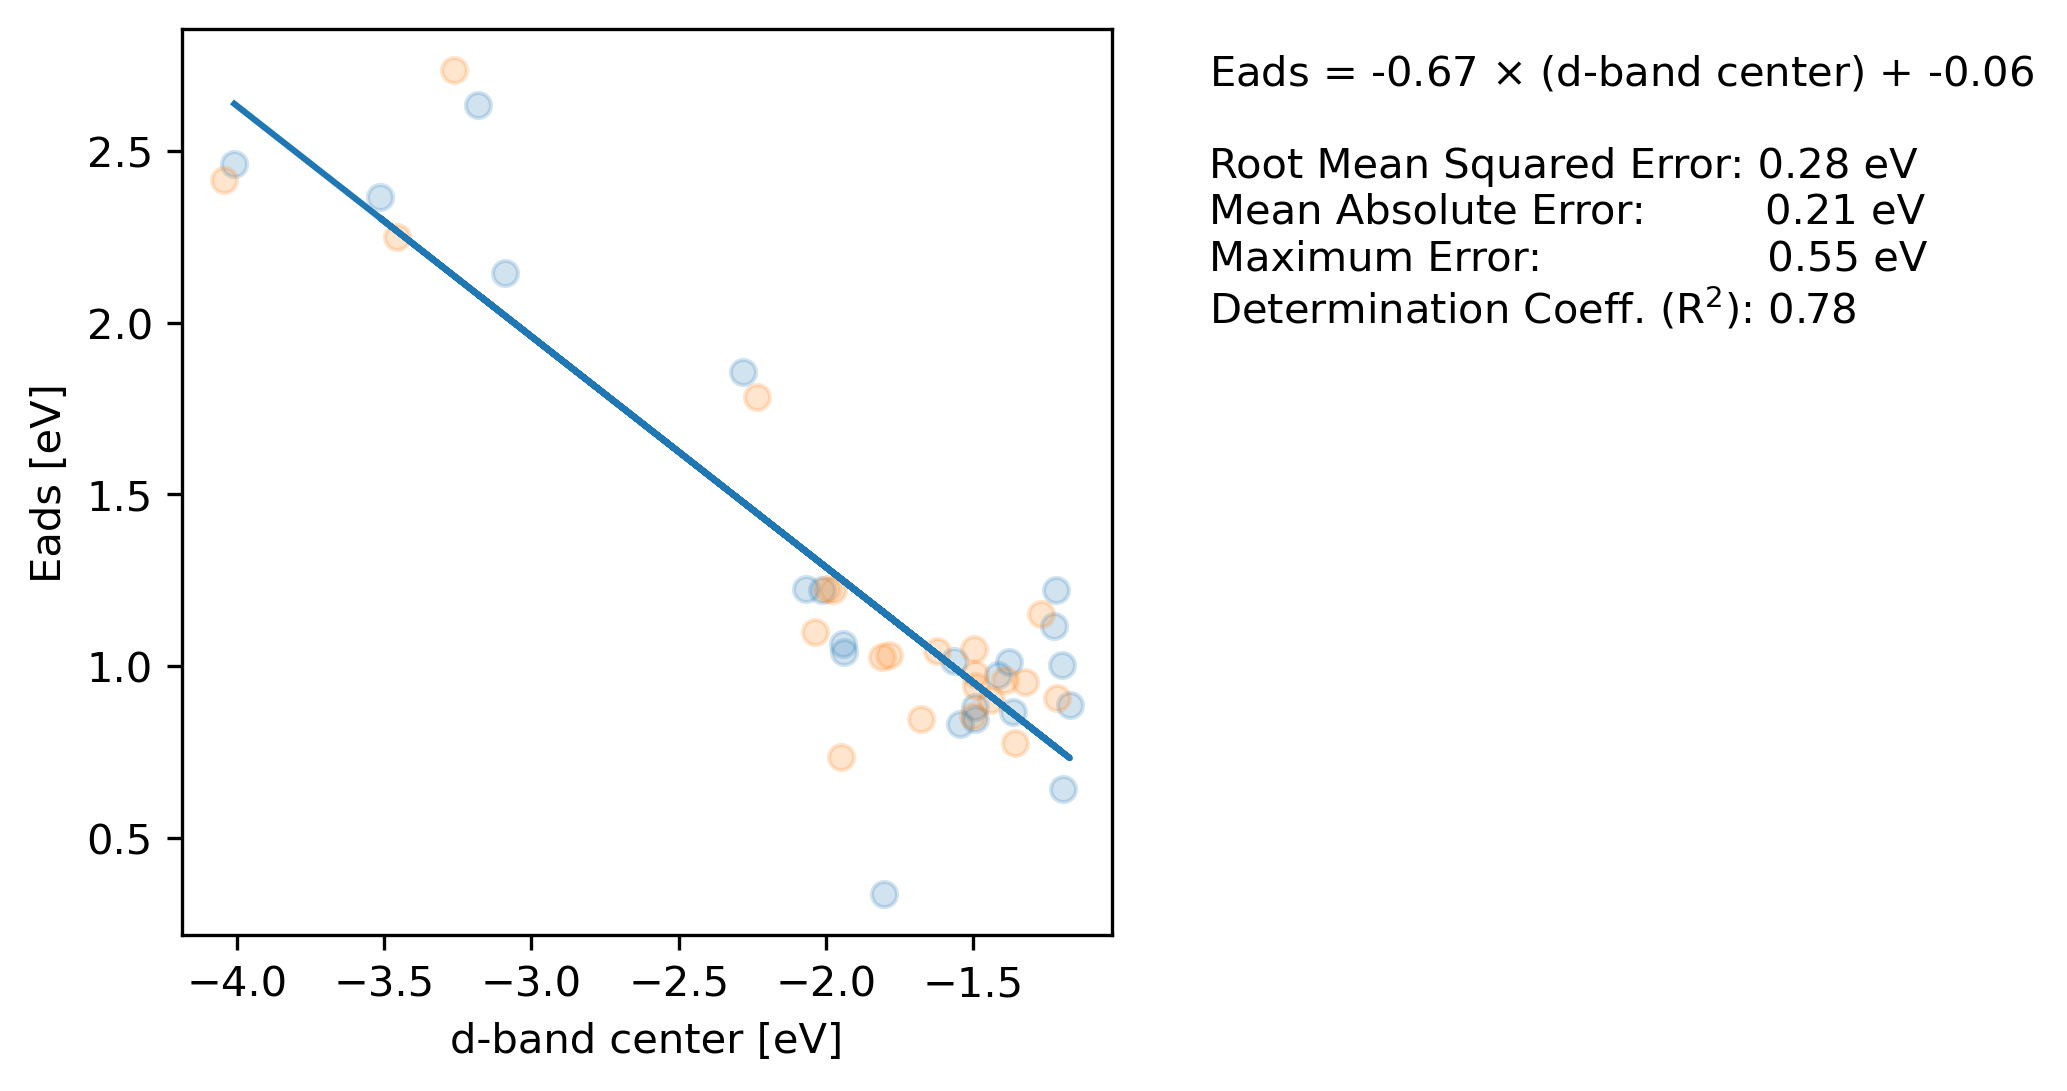

size traininig set: 22
size test set: 22
Coefficients: 
 [[-0.69505783]]
Intercept: 
 [0.0019654]
Root Mean squared error: 0.30
Mean absolute error: 0.26
Maximum Error: 0.62
Coefficient of determination: 0.69


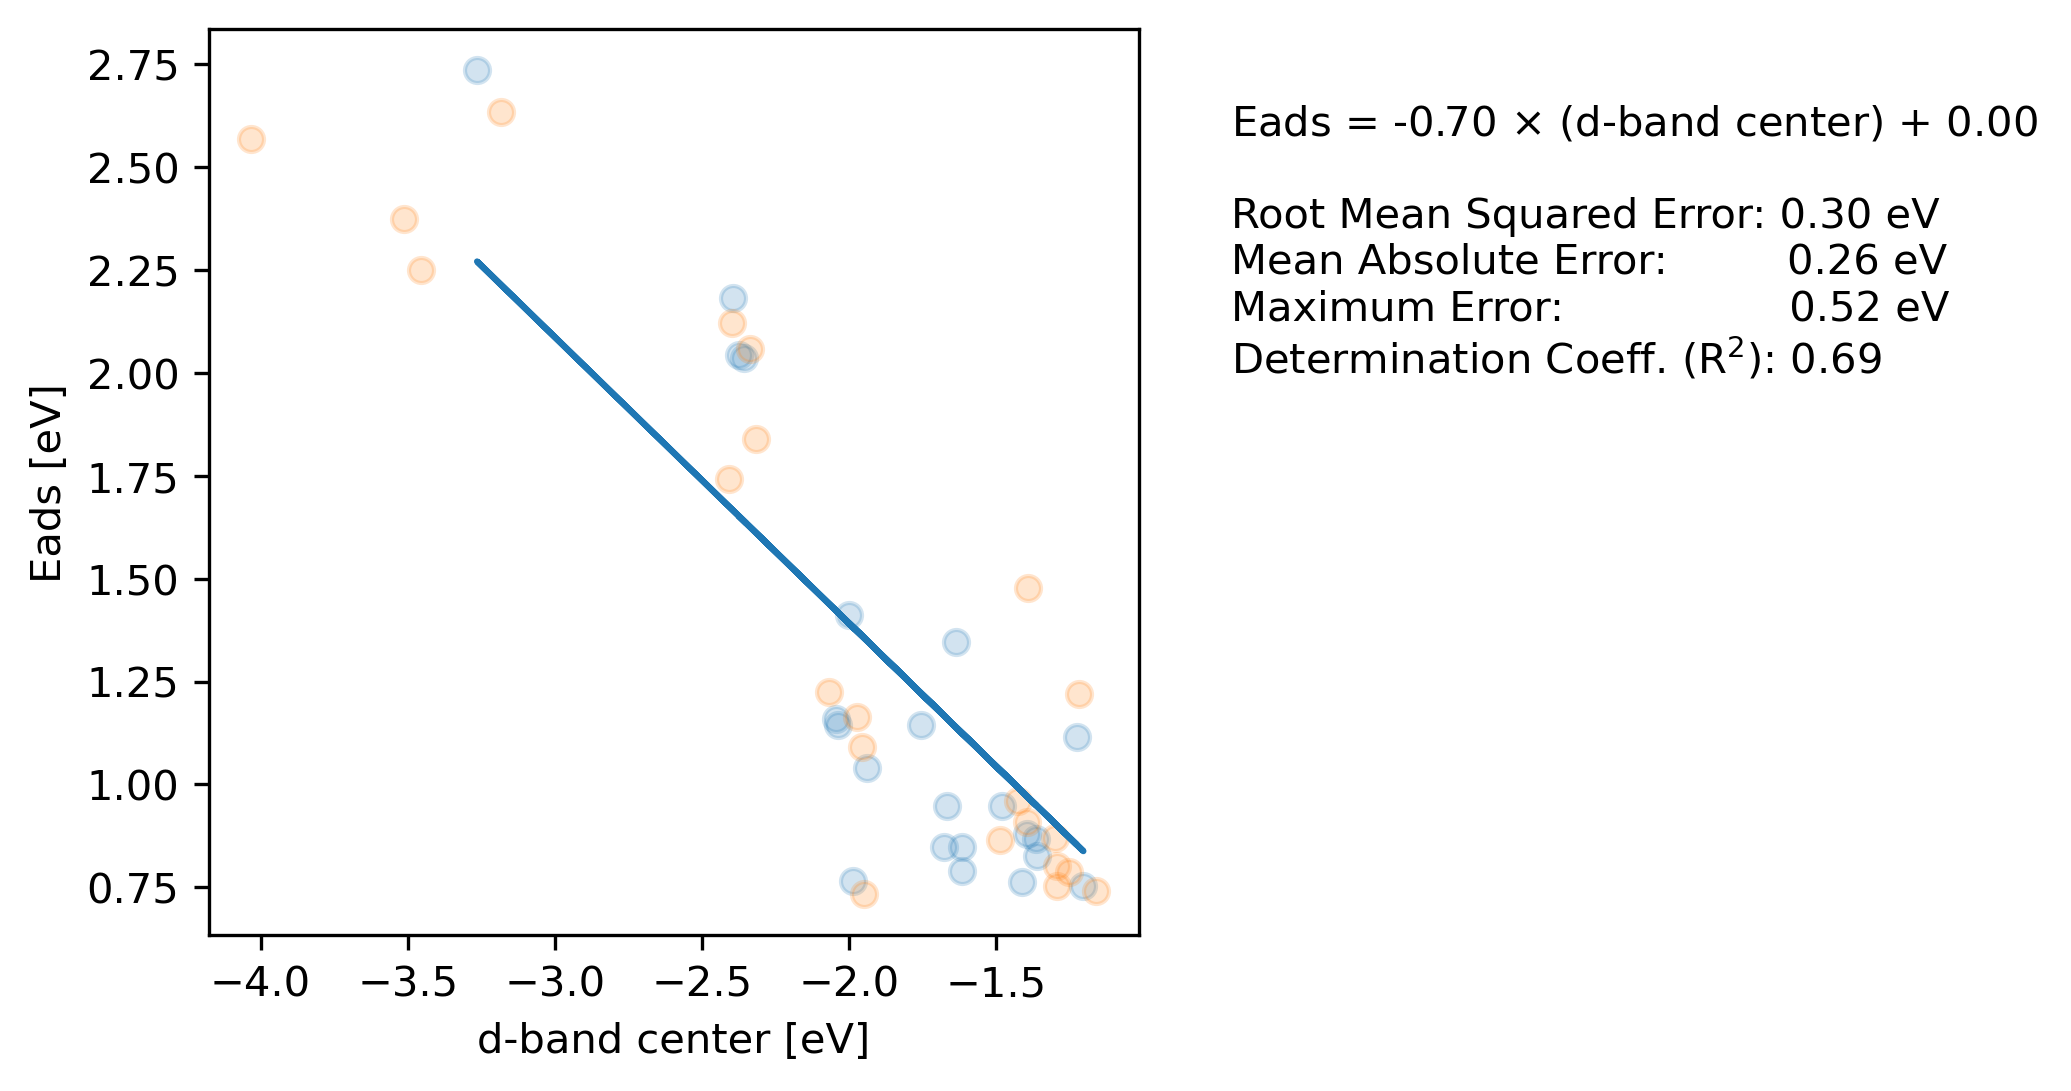

In [11]:
from sklearn.model_selection import train_test_split

maes = []
rmses = []
maxes = []

    # Split the data into training/testing sets
for i in range(10):
    train, test = train_test_split(data_CO, test_size=0.1, train_size=0.1, random_state =i)
    print ('size traininig set:', len(train))
    print ('size test set:', len(test))

    X_train = train['epsilon_d_eV'].to_numpy().reshape(-1,1)
    Y_train = train['E_ads_eV'].to_numpy().reshape(-1,1)

    X_test = test['epsilon_d_eV'].to_numpy().reshape(-1,1)
    Y_test = test['E_ads_eV'].to_numpy().reshape(-1,1)


    # Create linear regression object
    regr = linear_model.LinearRegression()

    regr.fit(X_train,Y_train)


    # Make predictions using the testing set
    Y_pred = regr.predict(X_test)


    # The coefficients
    print('Coefficients: \n', regr.coef_)
    print('Intercept: \n', regr.intercept_)

    # The root mean squared error
    print('Root Mean squared error: %.2f'
          % mean_squared_error(Y_test, Y_pred, squared=False))
    rmses.append(mean_squared_error(Y_test, Y_pred, squared=False))
    # The mean squared error
    print('Mean absolute error: %.2f'
          % mean_absolute_error(Y_test, Y_pred))
    maes.append(mean_absolute_error(Y_test, Y_pred))
    # Maximum Error
    print('Maximum Error: %.2f'
          % max(abs(Y_test - Y_pred)))
    maxes = np.append(maxes, (max(abs(Y_test - Y_pred))))
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.2f'
          % r2_score(Y_test, Y_pred))

    # Plot outputs

    fig, ax = plt.subplots(figsize=figsize)
    ax.scatter(X_test, Y_test,alpha=alpha)
    ax.scatter(X_train, Y_train,alpha=alpha,)
    ax.plot(X_test, Y_pred, )


    ax.set_ylabel('Eads [eV]')
    ax.set_xlabel('d-band center [eV]')

    s = r'Eads = %.2f $\times$ (d-band center) + %.2f ' % (regr.coef_ , regr.intercept_) + '\n \n'\
      + 'Root Mean Squared Error: %.2f eV \n' % mean_squared_error(Y_test, Y_pred, squared=False) \
      + 'Mean Absolute Error:         %.2f eV \n'   % mean_absolute_error(Y_test, Y_pred) \
      + 'Maximum Error:                 %.2f eV \n' % max(Y_test - Y_pred) \
      + 'Determination Coeff. (R$^{2}$): %.2f' % r2_score(Y_test, Y_pred)

    ax.text(x=-0.7,y=2.0,s=s)    
        
    plt.show()
    



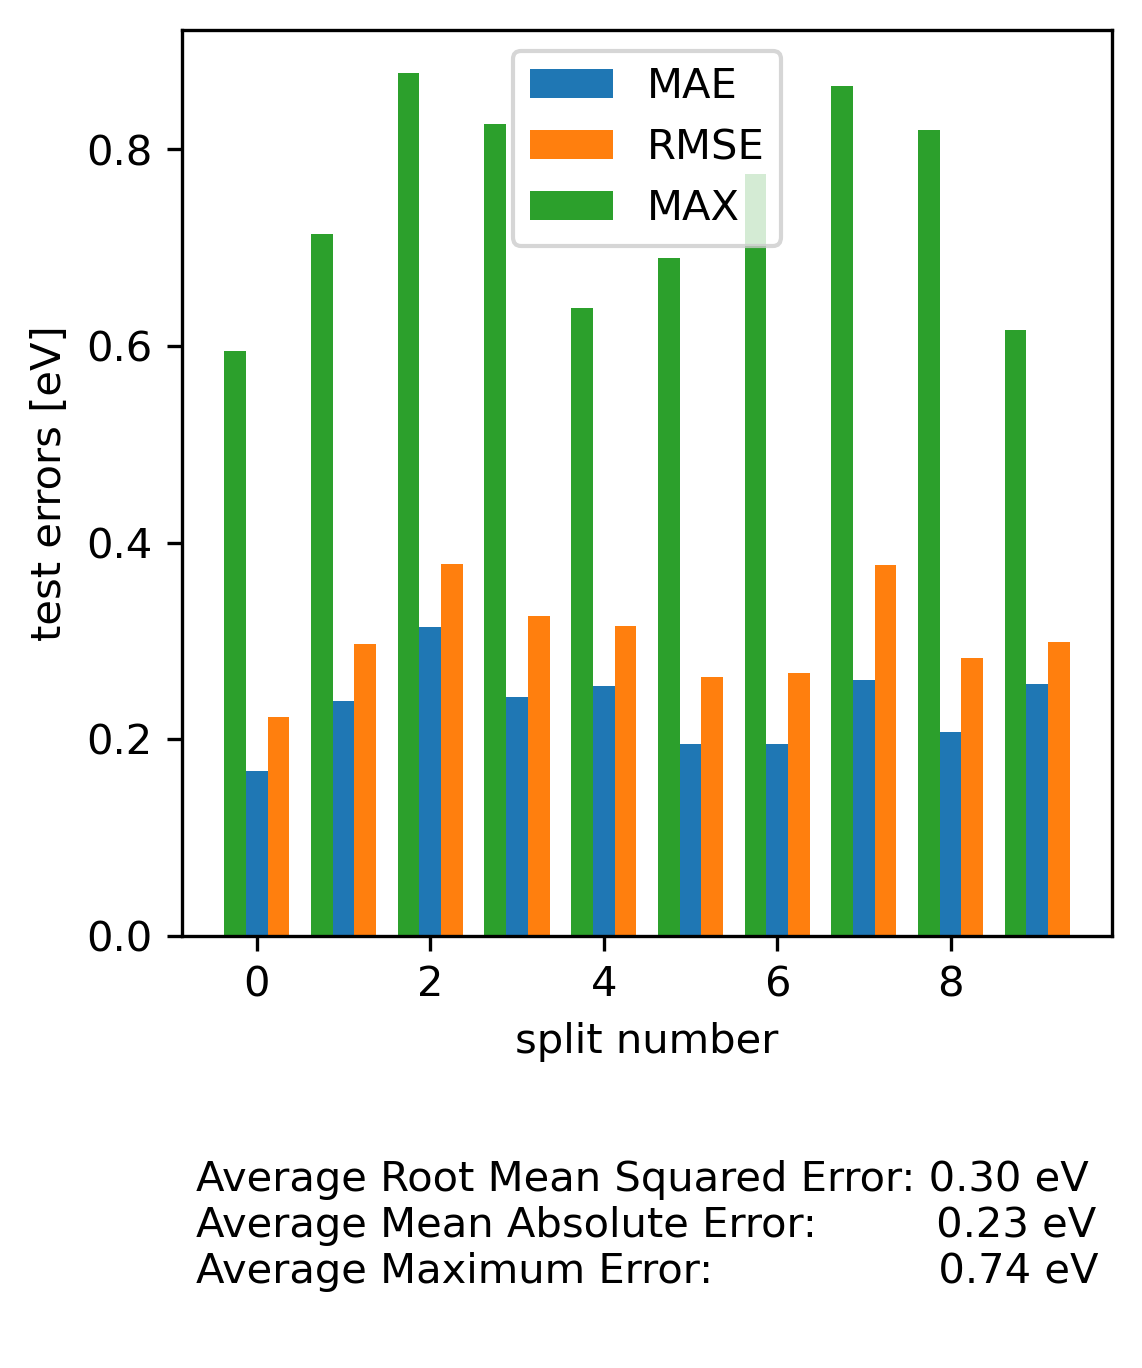

In [12]:
fig, ax = plt.subplots(figsize=figsize)
x = np.array(range(len(maes)))
width = 0.25
ax.bar(x, maes, width=width, label='MAE')
ax.bar(x+0.25, rmses, width=width, label='RMSE')
ax.bar(x-0.25,  maxes, width=width, label='MAX')
ax.legend()
ax.set_ylabel('test errors [eV]')
ax.set_xlabel('split number')


s = 'Average Root Mean Squared Error: %.2f eV \n' % np.mean(rmses) \
  + 'Average Mean Absolute Error:         %.2f eV \n'   % np.mean(maes) \
  + 'Average Maximum Error:                 %.2f eV \n' % np.mean(maxes) 


ax.text(x=-.7,y=-.40,s=s)



plt.savefig('fig5_random_effect.png', dpi=300, bbox_inches='tight')

# Learning curves
Erros are also sensitive to the number of data points used for training. This requires analyzing the learning curves, which can be obtained with the _2metric below.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_absolute_error

def plot_learning_curve_quants_2metric(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure(figsize=(4,3))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("Errors [eV]",fontsize=14)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='neg_mean_absolute_error')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    train_scores_q25 = np.quantile(train_scores,0.25, axis=1)
    train_scores_q50 = np.quantile(train_scores,0.50, axis=1)
    train_scores_q75 = np.quantile(train_scores, 0.75, axis=1)
    
    test_scores_q25 = np.quantile(test_scores,0.25, axis=1)
    test_scores_q50 = np.quantile(test_scores,0.50, axis=1)
    test_scores_q75 = np.quantile(test_scores, 0.75, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, -1*train_scores_q25,
                    -1*train_scores_q75, alpha=0.3,
                     color="r")
    plt.fill_between(train_sizes, -1*test_scores_q25,
                     -1*test_scores_q75, alpha=0.3, color="b")
    plt.plot(train_sizes, -train_scores_q50, '-', color="r",
             label="Train MAE")
    plt.plot(train_sizes, -test_scores_q50, '-', color="b",
             label="Test MAE")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='neg_root_mean_squared_error')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    train_scores_q25 = np.quantile(train_scores,0.25, axis=1)
    train_scores_q50 = np.quantile(train_scores,0.50, axis=1)
    train_scores_q75 = np.quantile(train_scores, 0.75, axis=1)
    
    test_scores_q25 = np.quantile(test_scores,0.25, axis=1)
    test_scores_q50 = np.quantile(test_scores,0.50, axis=1)
    test_scores_q75 = np.quantile(test_scores, 0.75, axis=1)
    

    plt.fill_between(train_sizes, -1*test_scores_q25,
                     -1*test_scores_q75, alpha=0.3, color="m")
    plt.plot(train_sizes, -test_scores_q50, '-', color="m", alpha=0.5,
             label="Test RMSE")    
    
    plt.legend(loc="best")
    return plt

Note the sensitivity to the number of splits.

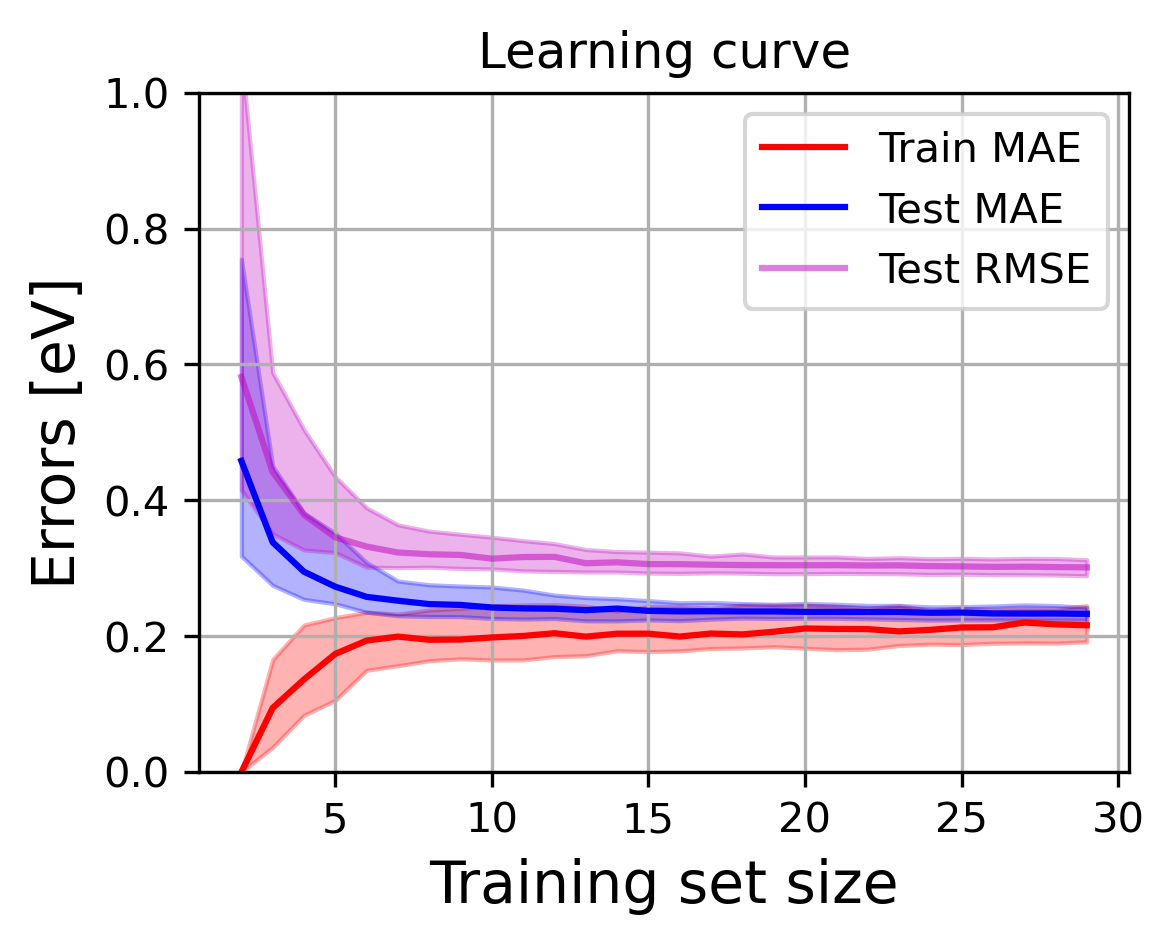

In [14]:
X = data_CO['epsilon_d_eV'].to_numpy().reshape(-1,1)
Y = data_CO['E_ads_eV'].to_numpy().reshape(-1,1)
cv = ShuffleSplit(n_splits=100, train_size = 0.5, test_size=0.5, random_state=0)
estimator = linear_model.LinearRegression()
title = 'Learning curve'
plot_learning_curve_quants_2metric(estimator, title, X, Y, ylim=(0, 1.), cv=cv, train_sizes = range(2,30))
plt.savefig('fig6_learning_curve.png', dpi=300, bbox_inches='tight')

<module 'matplotlib.pyplot' from '/Users/abruix/miniconda3/envs/npl/lib/python3.8/site-packages/matplotlib/pyplot.py'>

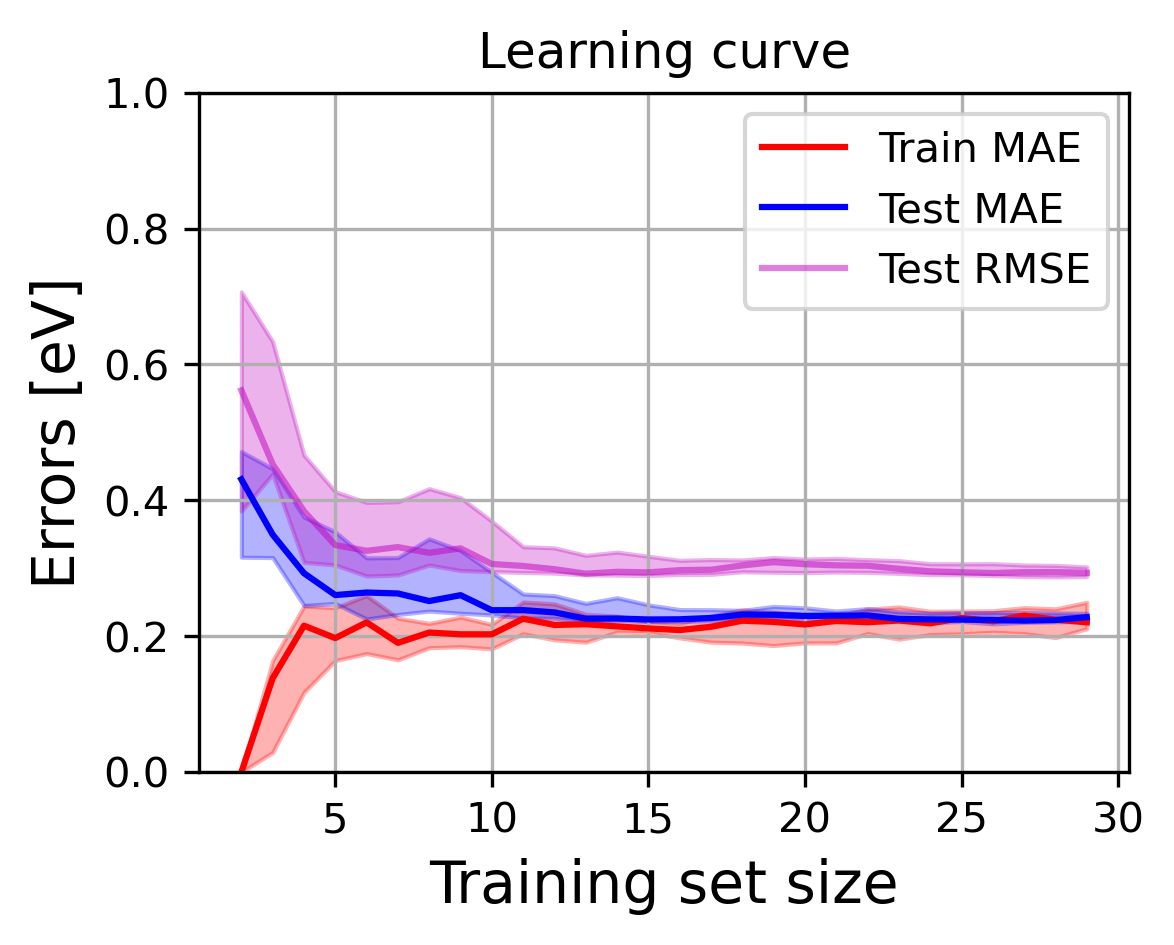

In [15]:
X = data_CO['epsilon_d_eV'].to_numpy().reshape(-1,1)
Y = data_CO['E_ads_eV'].to_numpy().reshape(-1,1)
cv = ShuffleSplit(n_splits=10, train_size = 0.5, test_size=0.5, random_state=0)
estimator = linear_model.LinearRegression()
title = 'Learning curve'
plot_learning_curve_quants_2metric(estimator, title, X, Y, ylim=(0, 1.), cv=cv, train_sizes = range(2,30))

# Exercise 1: Build a better model for predicting Eads

- Compare errors for different adsorbates
- Can you improve the model by adding more features of the adsorption sites? 
- Which features do you think are most relevant?
- Are the errors similar for different adsorbates? (e.g. C, H, OH)


In the cells below, we show how to add use different features/descriptors to perform a multivariate linear regression.

We can see all available columns/features by typing data.columns 

In [16]:
data.columns

Index(['Samples', 'E_ads_eV', 'bulk_nnd_Ang', 'site_nnd_Ang', 'r_d_Ang',
       'V_ad^2', 'CN', 'site_no', 'epsilon_d_eV', 'W_d_eV', 'S_d_eV', 'K_d_eV',
       'W_eV', 'IP_eV', 'EA_eV', 'f_d', 'f_sp', 'PE', 'DOS_d_eV^(-1)',
       'DOS_sp_eV^(-1)'],
      dtype='object')

We can now select descriptors by definign the predictors variable. We just need to include all the columns that we want in the 

In [17]:
mask_CO = data['Samples'].str.contains("CO")
predictors=['epsilon_d_eV','CN','IP_eV', 'PE']
data_CO = data[mask_CO]

In [18]:
data_CO

Samples  E_ads_eV  bulk_nnd_Ang  site_nnd_Ang  r_d_Ang  \
245   CO_Ag_211_four-fold-s     2.417         2.985         2.965     0.89   
246     CO_Ag_211_bridge2-s     2.462         2.985         2.946     0.89   
247         CO_Ag_211_top-s     2.335         2.985         2.946     0.89   
248     CO_Ag_211_bridge2-t     2.567         2.985         2.972     0.89   
249         CO_Ag_211_top-t     2.428         2.985         2.972     0.89   
...                     ...       ...           ...           ...      ...   
1014       CO_Ni_100_bridge     0.886         2.502         2.486     0.71   
1015       CO_Pd_100_bridge     0.871         2.819         2.816     0.94   
1016       CO_Pt_100_bridge     0.693         2.838         2.828     1.04   
1017       CO_Rh_100_bridge     0.762         2.734         2.710     0.99   
1018       CO_Ru_100_bridge     0.642         2.732         2.703     1.05   

      V_ad^2   CN  site_no  epsilon_d_eV  W_d_eV  S_d_eV  K_d_eV   W_eV  \
245     2.26  8.5        4        -4.042   1.034   2.954  21.737  4.427   
246     2.26  7.0        2        -4.008   0.934   2.823  21.910  4.427   
247     2.26  7.0        1        -4.008   0.934   2.824  21.923  4.427   
248     2.26  9.0        2        -4.033   1.122   3.417  25.416  4.427   
249     2.26  9.0        1        -4.033   1.122   3.418  25.417  4.427   
...      ...  ...      ...           ...     ...     ...     ...    ...   
1014    1.16  8.0        2        -1.173   1.742   2.723  18.018  5.115   
1015    2.78  8.0        2        -1.528   1.308   0.818   6.653  5.279   
1016    3.90  8.0        2        -1.842   1.864   0.654   5.256  5.881   
1017    3.32  8.0        2        -1.413   2.024   1.234   7.427  5.266   
1018    3.87  8.0        2        -1.197   2.030   0.432   3.927  5.109   

      IP_eV  EA_eV    f_d   f_sp    PE  DOS_d_eV^(-1)  DOS_sp_eV^(-1)  
245   7.576  1.304  9.847  1.128  1.93          0.037           0.276  
246   7.576  1.304  9.856  1.051  1.93          0.031           0.290  
247   7.576  1.304  9.865  1.051  1.93          0.031           0.290  
248   7.576  1.304  9.843  1.148  1.93          0.040           0.281  
249   7.576  1.304  9.837  1.148  1.93          0.040           0.281  
...     ...    ...    ...    ...   ...            ...             ...  
1014  7.640  1.157  8.690  1.198  1.91          1.900           0.173  
1015  8.337  0.562  9.316  0.721  2.20          1.883           0.135  
1016  8.959  2.125  8.860  1.119  2.28          1.687           0.152  
1017  7.459  1.143  7.942  1.054  2.28          1.839           0.184  
1018  7.361  1.046  7.128  0.861  2.20          1.969           0.238  

[220 rows x 20 columns]

<module 'matplotlib.pyplot' from '/Users/abruix/miniconda3/envs/npl/lib/python3.8/site-packages/matplotlib/pyplot.py'>

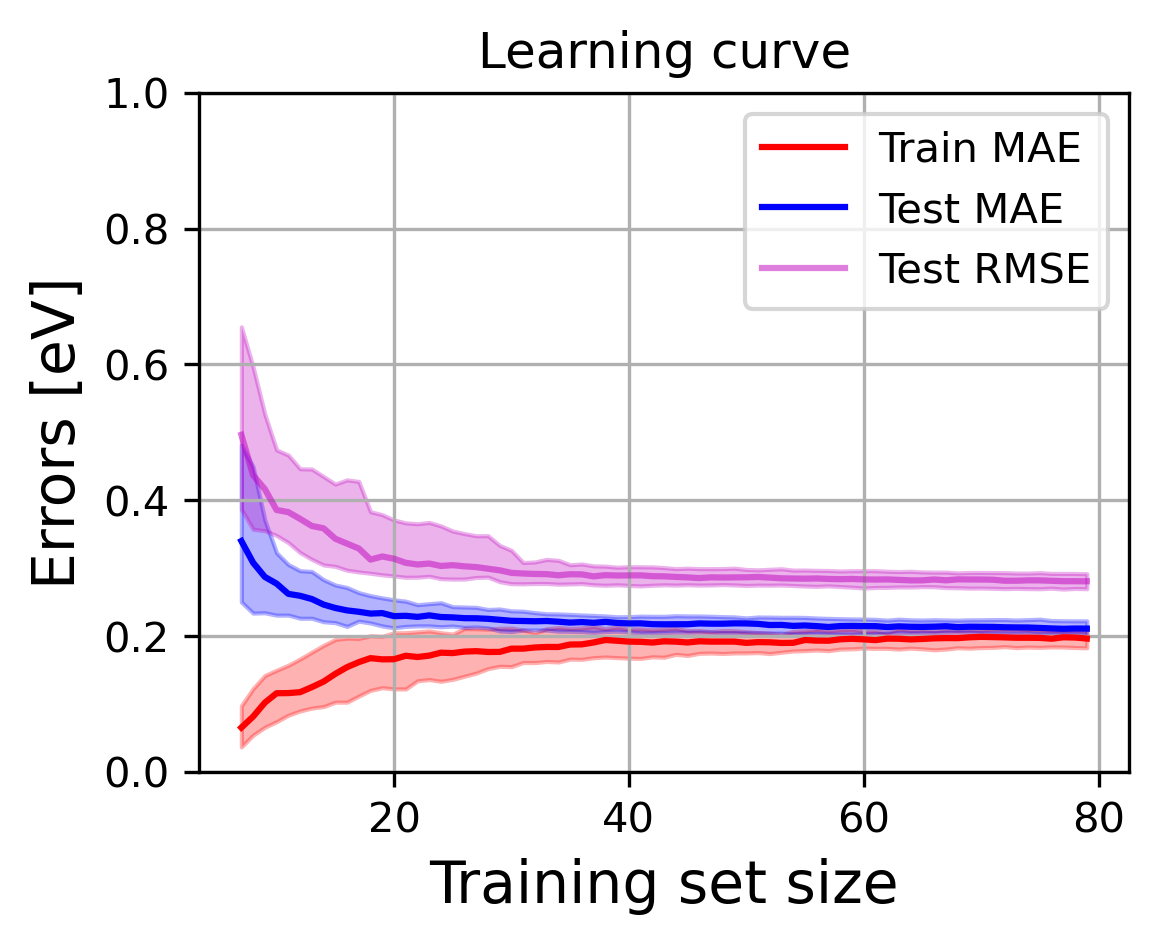

In [19]:
X = data_CO[predictors].to_numpy().reshape(-1,len(predictors))
Y = data_CO['E_ads_eV'].to_numpy().reshape(-1,1)
cv = ShuffleSplit(n_splits=100, train_size = 0.5, test_size=0.5, random_state=0)
estimator = linear_model.LinearRegression()
title = 'Learning curve'
plot_learning_curve_quants_2metric(estimator, title, X, Y, ylim=(0, 1.), cv=cv, train_sizes = range(7,80))

We can also plot the results in the form of a parity plot, which compares predicted and real values graphically.

size traininig set: 110
size test set: 110
Coefficients: 
 [[-0.76407832  0.07360563 -0.15682651 -0.06396536]]
Intercept: 
 [0.59287506]
Root Mean squared error: 0.27
Mean absolute error: 0.21
Maximum Error: 0.84
Coefficient of determination: 0.78


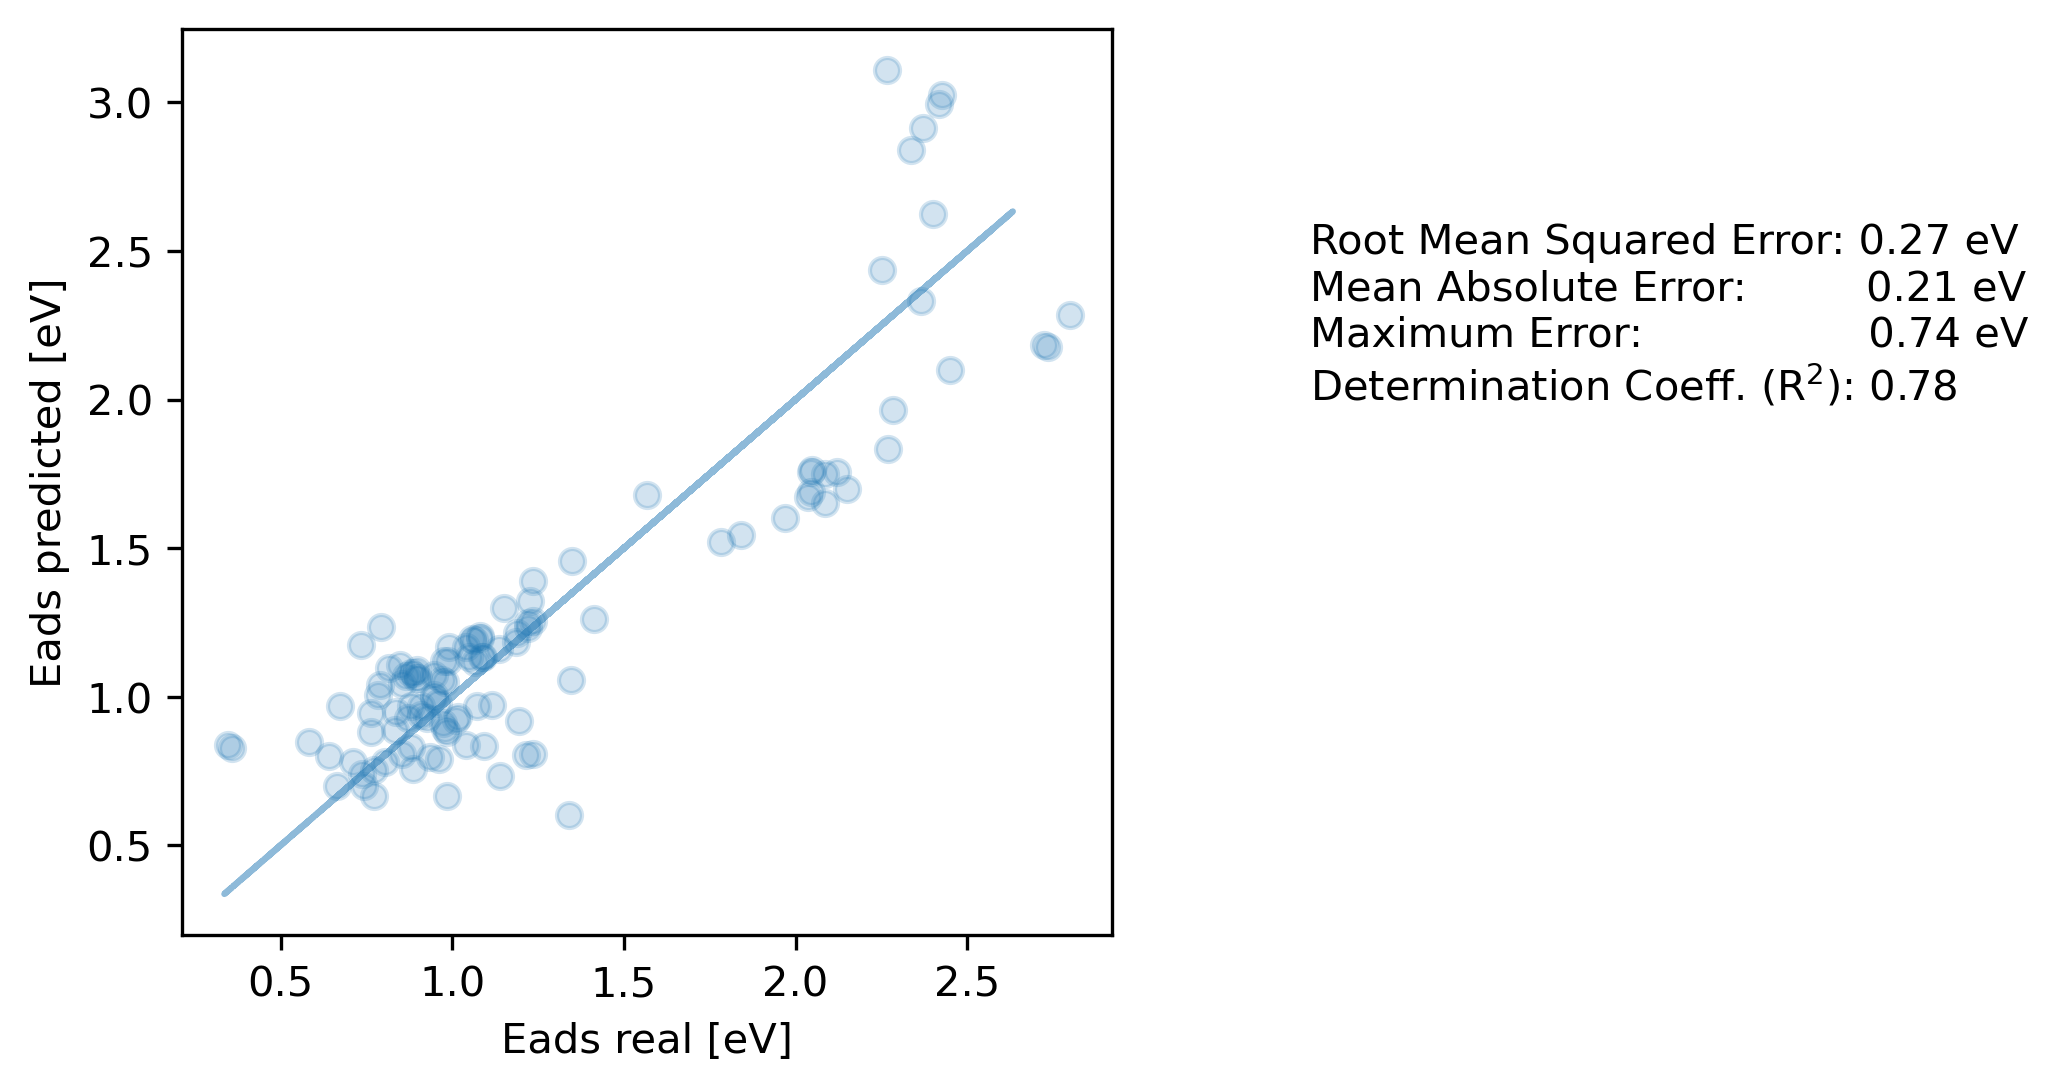

In [20]:
# Split the data into training/testing sets

train, test = train_test_split(data_CO, train_size = 0.5, test_size=0.5, random_state =1)
print ('size traininig set:', len(train))
print ('size test set:', len(test))

X_train = train[predictors].to_numpy().reshape(-1,len(predictors))
Y_train = train['E_ads_eV'].to_numpy().reshape(-1,1)

X_test = test[predictors].to_numpy().reshape(-1,len(predictors))
Y_test = test['E_ads_eV'].to_numpy().reshape(-1,1)


# Create linear regression object
regr = linear_model.LinearRegression()

regr.fit(X_train,Y_train)


# Make predictions using the testing set
Y_pred = regr.predict(X_test)


# The coefficients
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

# The root mean squared error
print('Root Mean squared error: %.2f'
      % mean_squared_error(Y_test, Y_pred, squared=False))
# The mean squared error
print('Mean absolute error: %.2f'
      % mean_absolute_error(Y_test, Y_pred))

# Maximum Error
print('Maximum Error: %.2f'
      % max(abs(Y_test - Y_pred)))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, Y_pred))

# Plot outputs

fig, ax = plt.subplots(figsize=figsize)
ax.scatter(Y_test, Y_pred,alpha=alpha)
ax.plot(Y_train, Y_train,'--',alpha=0.5,)



ax.set_ylabel('Eads predicted [eV]')
ax.set_xlabel('Eads real [eV]')


s = 'Root Mean Squared Error: %.2f eV \n' % mean_squared_error(Y_test, Y_pred, squared=False) \
  + 'Mean Absolute Error:         %.2f eV \n'   % mean_absolute_error(Y_test, Y_pred) \
  + 'Maximum Error:                 %.2f eV \n' % max(Y_test - Y_pred) \
  + 'Determination Coeff. (R$^{2}$): %.2f' % r2_score(Y_test, Y_pred)

ax.text(x=3.5,y=2.0,s=s)

plt.show()

Practical exercise:


# Exercise 2: train a NN to predict Eads

We can now try to build a neural network to predict the same properties.


- Edit the notebook to change the NN architecture. Can you get lower errors than with the linear model? Try to obtain the lowest error possible with a NN.


We begin by loading some extra function and modules.

In [21]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [22]:
mask_CO = data['Samples'].str.contains("CO")
predictors=['epsilon_d_eV','CN','IP_eV', 'PE']
target_column=["E_ads_eV"]
data_CO = data[mask_CO]
data_CO[predictors] = data_CO[predictors]/data_CO[predictors].max()
data_CO.describe().transpose()

/Users/abruix/miniconda3/envs/npl/lib/python3.8/site-packages/pandas/core/frame.py:3636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


count      mean       std       min       25%       50%  \
E_ads_eV        220.0  1.274436  0.596165  0.336000  0.870750  1.039500   
bulk_nnd_Ang    220.0  2.751650  0.136341  2.502000  2.732000  2.753000   
site_nnd_Ang    220.0  2.724523  0.135997  2.461000  2.691750  2.719000   
r_d_Ang         220.0  0.940209  0.140896  0.670000  0.890000  0.990000   
V_ad^2          220.0  3.009464  1.166930  1.000000  2.260000  3.320000   
CN              220.0  0.836288  0.091564  0.700000  0.766700  0.850000   
site_no         220.0  2.059091  0.805891  1.000000  1.000000  2.000000   
epsilon_d_eV    220.0  1.691222  0.647894  1.000000  1.214099  1.496519   
W_d_eV          220.0  1.860155  0.544675  0.882000  1.335000  1.974000   
S_d_eV          220.0  1.436227  0.752335  0.338000  0.738750  1.428000   
K_d_eV          220.0  9.858777  4.991289  3.173000  5.149000  9.497000   
W_eV            220.0  5.144718  0.341491  4.398000  4.945000  5.099000   
IP_eV           220.0  0.884331  0.073381  0.797854  0.821158  0.861966   
EA_eV           220.0  1.368759  0.439639  0.562000  1.143000  1.236000   
f_d             220.0  8.586145  0.881079  7.019000  7.848000  8.706000   
f_sp            220.0  1.116209  0.160324  0.678000  1.058500  1.143000   
PE              220.0  0.852371  0.070047  0.748031  0.759843  0.866142   
DOS_d_eV^(-1)   220.0  1.329436  0.780550  0.031000  0.534000  1.616000   
DOS_sp_eV^(-1)  220.0  0.186782  0.057784  0.103000  0.135750  0.175500   

                      75%        max  
E_ads_eV         1.438250   2.799000  
bulk_nnd_Ang     2.819000   2.990000  
site_nnd_Ang     2.796750   2.996000  
r_d_Ang          1.040000   1.080000  
V_ad^2           3.900000   4.450000  
CN               0.900000   1.000000  
site_no          3.000000   4.000000  
epsilon_d_eV     1.926675   3.604003  
W_d_eV           2.294250   2.793000  
S_d_eV           1.938500   3.418000  
K_d_eV          13.553500  25.417000  
W_eV             5.414000   5.922000  
IP_eV            0.971060   1.000000  
EA_eV            1.564000   2.309000  
f_d              9.446750   9.905000  
f_sp             1.236500   1.353000  
PE               0.897638   1.000000  
DOS_d_eV^(-1)    1.904000   2.515000  
DOS_sp_eV^(-1)   0.238250   0.389000

We split the data into 50% training and 50% test and train with the same MLPRegressor.

The architecture of the NN can be edited by the line:

mlp = MLPRegressor(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)

The option hidden_layer_sizes controls the number of layers (dimension of vector) and the number of neurons per layer (vales for each vector coordinate) . 

(110, 4)
(110, 4)


/Users/abruix/miniconda3/envs/npl/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Root Mean squared error: 0.37
Mean absolute error: 0.30
Maximum Error: 0.86


/Users/abruix/miniconda3/envs/npl/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(3.5, 2.0, 'Root Mean Squared Error: 0.37 eV \nMean Absolute Error:         0.30 eV \nMaximum Error:                 0.86 eV \n')

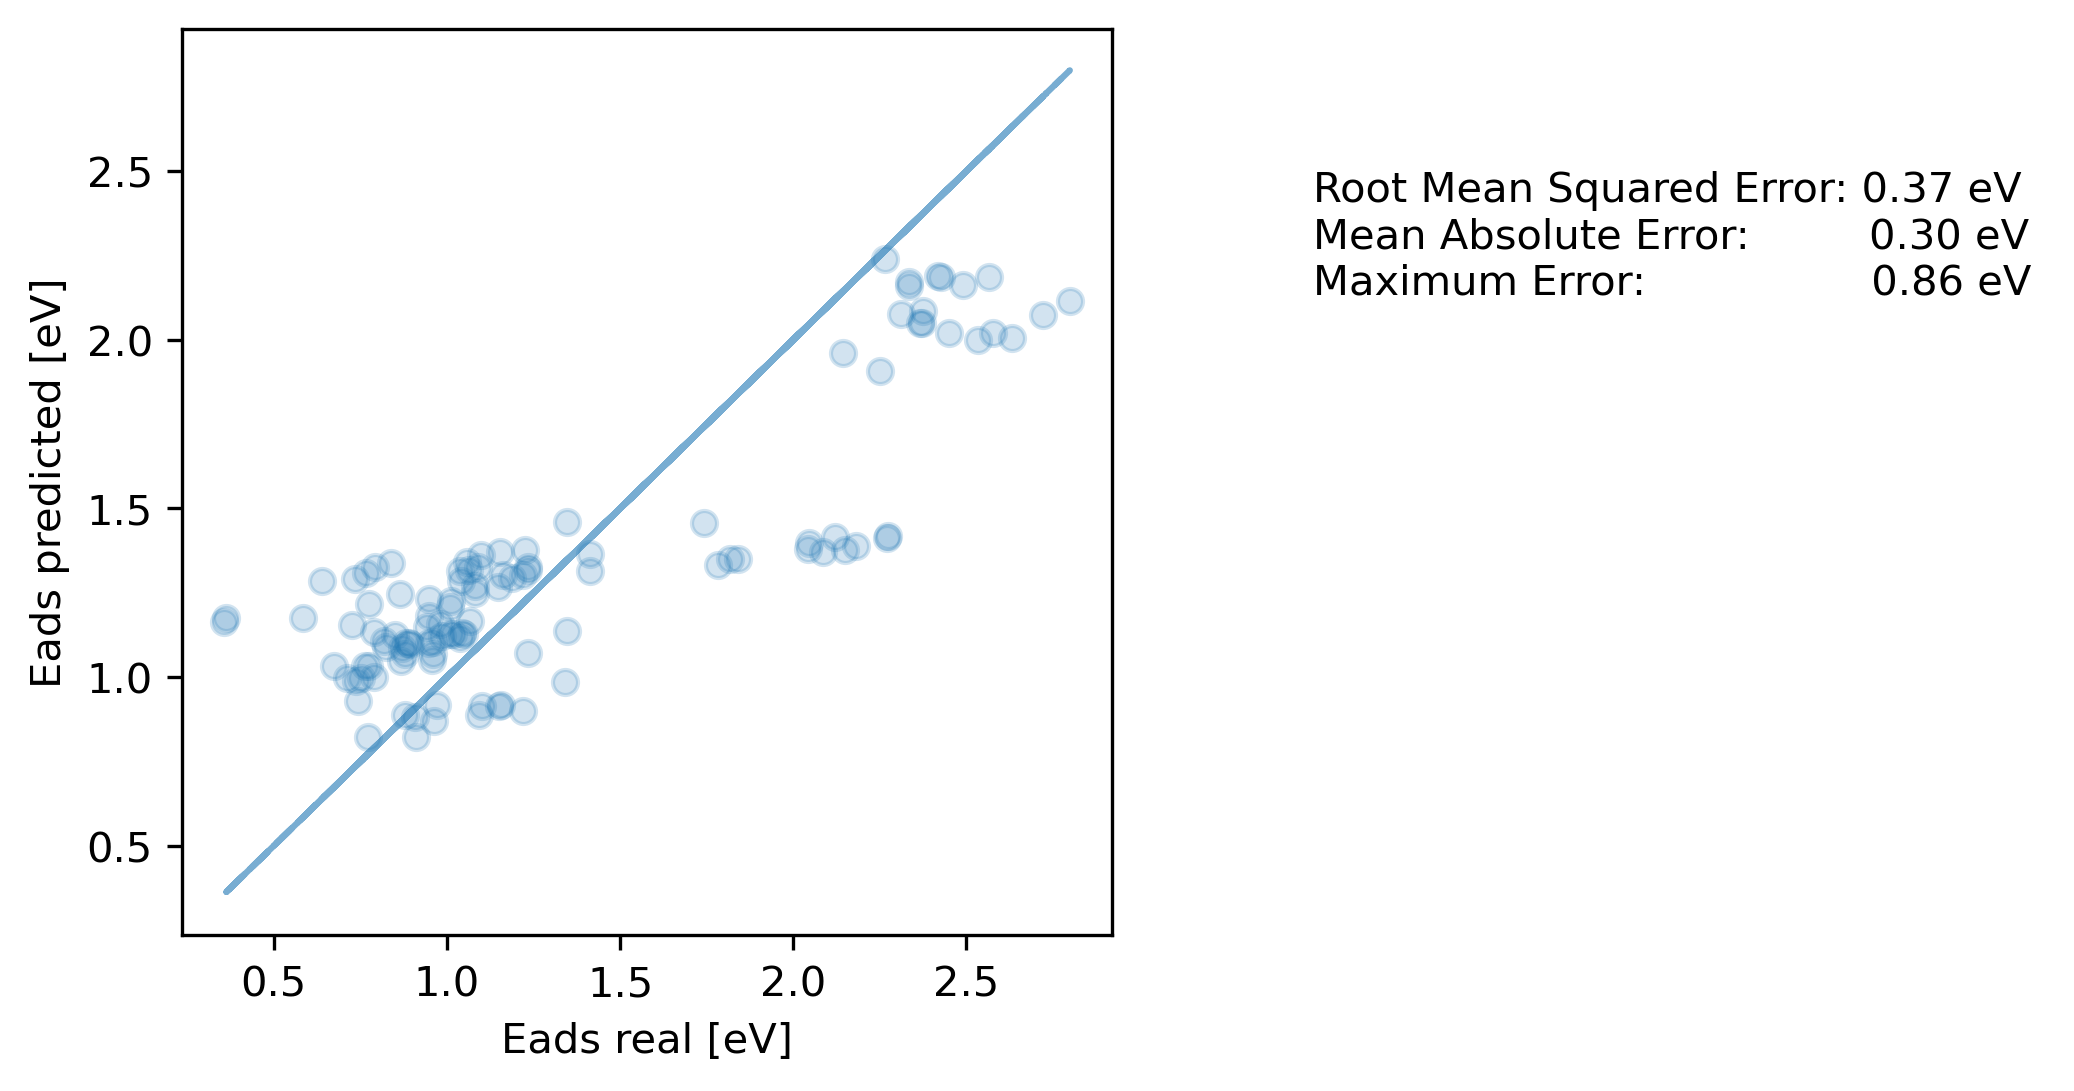

In [23]:
from sklearn.neural_network import MLPRegressor

X = data_CO[predictors].values
y = data_CO[target_column].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, train_size = 0.5, random_state=40)
print(X_train.shape); print(X_test.shape)


mlp = MLPRegressor(hidden_layer_sizes=(8,2), activation='relu', solver='adam', max_iter=500,random_state=1)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

# Plot outputs

fig, ax = plt.subplots(figsize=figsize)
ax.scatter(y_test, predict_test, alpha=alpha)
ax.plot(y_test, y_test,'--',alpha=0.6,)


ax.set_ylabel('Eads predicted [eV]')
ax.set_xlabel('Eads real [eV]')


# The root mean squared error
print('Root Mean squared error: %.2f'
      % mean_squared_error(y_test, predict_test, squared=False))
# The mean squared error
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_test, predict_test))

# Maximum Error
print('Maximum Error: %.2f'
      % max(abs(y_test.reshape(len(y_test)) - predict_test.reshape(len(predict_test)))))

s = 'Root Mean Squared Error: %.2f eV \n' % mean_squared_error(y_test, predict_test, squared=False) \
  + 'Mean Absolute Error:         %.2f eV \n'   % mean_absolute_error(y_test, predict_test) \
  + 'Maximum Error:                 %.2f eV \n' % max(abs(y_test.reshape(len(y_test)) - predict_test.reshape(len(predict_test)))) 

ax.text(x=3.5,y=2.0,s=s)


# Exercise 3: Atomistic ML, building a ML potential

In this example, we will use a database of Pt6Au6 molecule structures and their energies. The goal is to build a model that is able to predict the total energy of the molecule from the structural data.

For that, we will rely on the Couloumb Matrix descriptor.

The database contains 25k structures and their energies, as well as the descriptor derived from each structure.

We will train a NN that maps the energies and Coulomb matrix descriptors of the Pt6Au6 system.

We first need to install the ase package into our virtual space. 

In [24]:
# !pip install ase

In [26]:
from ase.db import connect
import numpy as np
# from google.colab import drive
# drive.mount("/content/drive")

# db = connect('drive/MyDrive/ML_iqtcub/test.db')
db = connect('test.db')
X = [f.data.CoulombMatrix for f in db.select()]
y = [f.energy for f in db.select()]



In [27]:
np.shape(X)

(25020, 144)

In [28]:
X = np.asarray(X)
X = np.reshape(X,(len(X),144))

In [29]:
np.shape(X)


(25020, 144)

In [30]:
len(y)

25020

In [44]:
from ase.io import read
from ase.visualize import view
# structure_example = read('drive/MyDrive/ML_iqtcub/test.db@42')
structure_example = read('test.db@42')
print ('E = {} eV'.format(structure_example.get_potential_energy()))
print (structure_example.get_positions())
view(structure_example)

E = 31.736263769228227 eV
[[11.02735451  7.95112293  9.09947493]
 [ 4.0029698  10.87684801  9.24758838]
 [ 4.79184454  7.52113805  7.78967163]
 [ 4.3481032  10.46460575  6.68814652]
 [11.78159881  9.27251078  7.67656756]
 [ 8.92457585  8.39710395  7.19127121]
 [ 9.03618394  4.63389806  5.34725724]
 [ 9.64861423  9.07029506 10.44346861]
 [11.22903985  6.44470044 10.59658944]
 [ 7.41441968  7.01827386  9.48357567]
 [10.11673401  6.86282548  7.1615045 ]
 [ 4.68072978  8.05585421  4.24873337]]


In [45]:
X[42]

array([17917.4014091 ,  1566.95590935,  1749.980213  ,  1717.00744626,
        2565.41857032,  3171.01129514,  2032.65112889,   993.54679318,
        2072.07737774,  1140.67274019,   903.89235304,   810.21290968,
        1566.95590935, 17917.4014091 ,  1961.47227229,  2033.97422141,
        2766.87824318,  1812.80731315,   919.9047244 ,   779.61530518,
        1760.84054421,  1072.16729959,   927.46145698,  1019.00578035,
        1749.980213  ,  1961.47227229, 17917.4014091 ,  1554.47453105,
        1642.70134852,  2005.94229707,  1237.73592003,  1040.84332899,
        1176.7791642 ,  1948.58734291,  1142.40617231,  1195.15882458,
        1717.00744626,  2033.97422141,  1554.47453105, 17917.4014091 ,
        2888.36564679,  1353.75856671,  1045.36121382,   673.88034048,
        1502.10672416,   867.32842077,   694.23393605,   717.87264282,
        2565.41857032,  2766.87824318,  1642.70134852,  2888.36564679,
       17377.89027732,  2116.66133904,  1143.31126631,   771.33359458,
      

We split the data into 50% training and 50% test and train with the same MLPRegressor as before.

Try different NN architechtures and see if you can get low errors.

Spitting data
Scaling data
Training regressor
Testing regressor
Calcluating MAE 
Numer of iterations 200


/Users/abruix/miniconda3/envs/npl/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(20, 2.0, 'Root Mean Squared Error: 2.38 eV \nMean Absolute Error:         1.86 eV \nMaximum Error:                 10.78 eV \nDetermination Coeff. (R$^{2}$): 0.69')

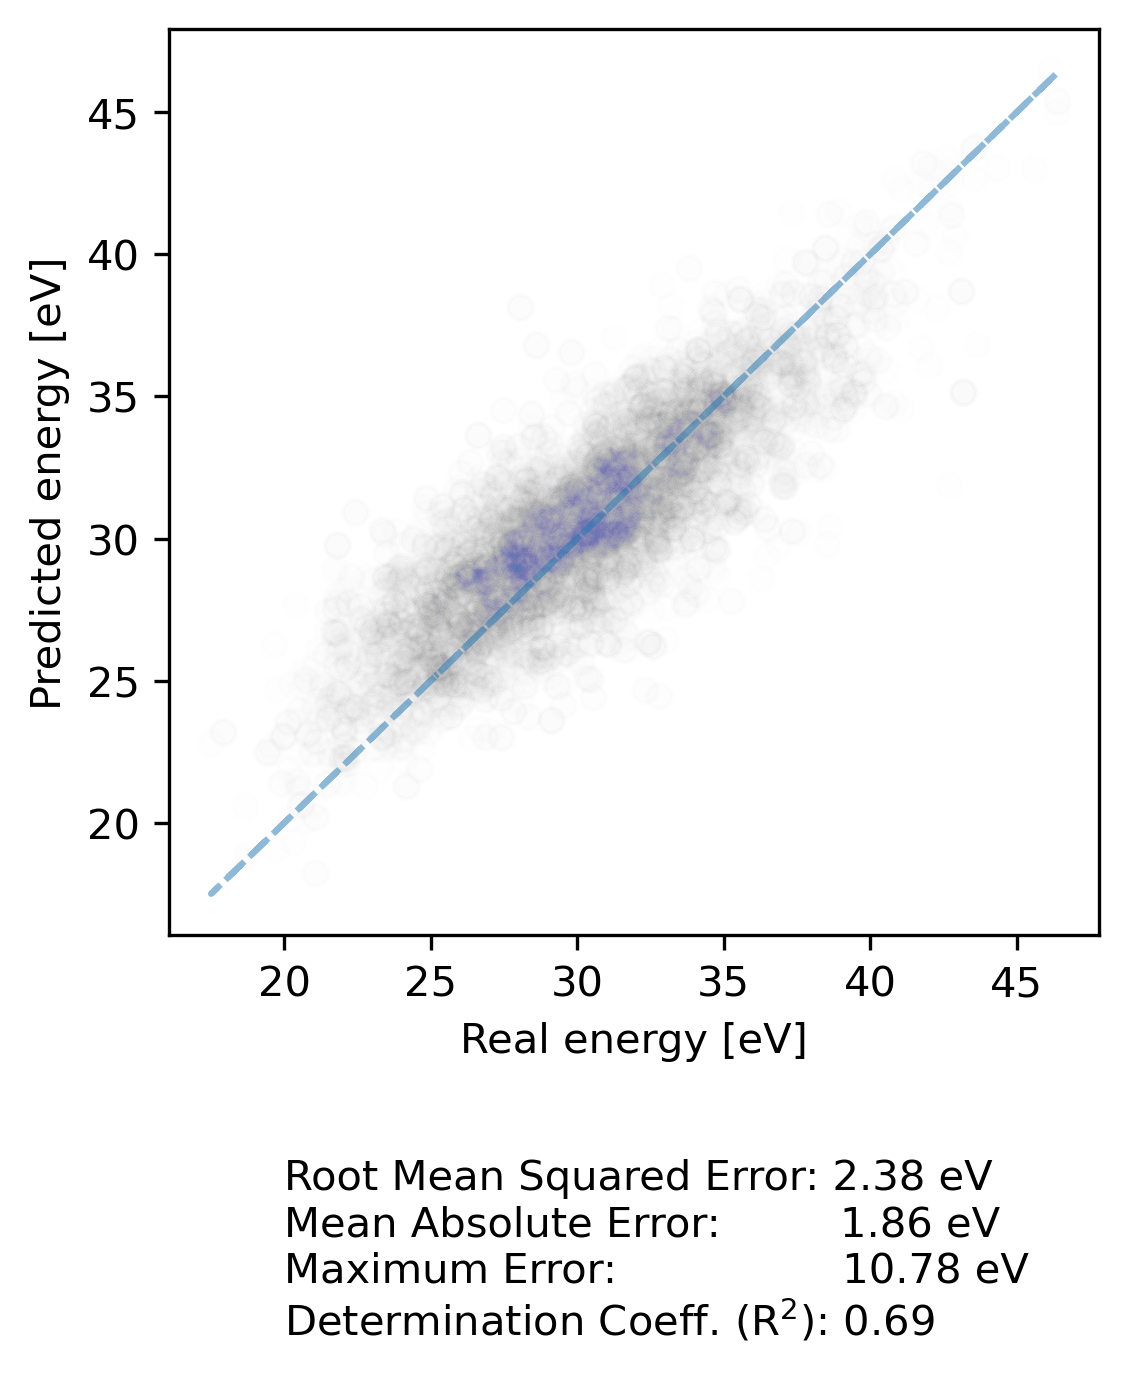

In [49]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler  

print ('Spitting data')
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

print ('Scaling data')
# scaler = StandardScaler()
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

print ('Training regressor')
regr = MLPRegressor(hidden_layer_sizes=(32,32,32,32,32,32,32),random_state=1, max_iter=200,activation='relu').fit(X_train, y_train)

print ('Testing regressor')
y_pred = regr.predict(X_test)

print ('Calcluating MAE ')
mean_absolute_error(y_test,y_pred)

print ('Numer of iterations', regr.n_iter_)



# Plot outputs
figsize = (4,4)

fig, ax = plt.subplots(figsize=figsize)
ax.scatter(y_test, y_pred,alpha=0.005)
ax.plot(y_train, y_train,'--',alpha=0.5,)
ax.set_xlabel('Real energy [eV]')
ax.set_ylabel('Predicted energy [eV]')

s = 'Root Mean Squared Error: %.2f eV \n' % mean_squared_error(y_test, y_pred, squared=False) \
  + 'Mean Absolute Error:         %.2f eV \n'   % mean_absolute_error(y_test, y_pred) \
  + 'Maximum Error:                 %.2f eV \n' % max(y_test - y_pred) \
  + 'Determination Coeff. (R$^{2}$): %.2f' % r2_score(y_test, y_pred)

ax.text(x=20,y=2.0,s=s)

Training regressor
Testing regressor
Calcluating MAE 
Numer of iterations 200


/Users/abruix/miniconda3/envs/npl/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Text(20, 2.0, 'Root Mean Squared Error: 3.18 eV \nMean Absolute Error:         2.51 eV \nMaximum Error:                 13.63 eV \nDetermination Coeff. (R$^{2}$): 0.45')

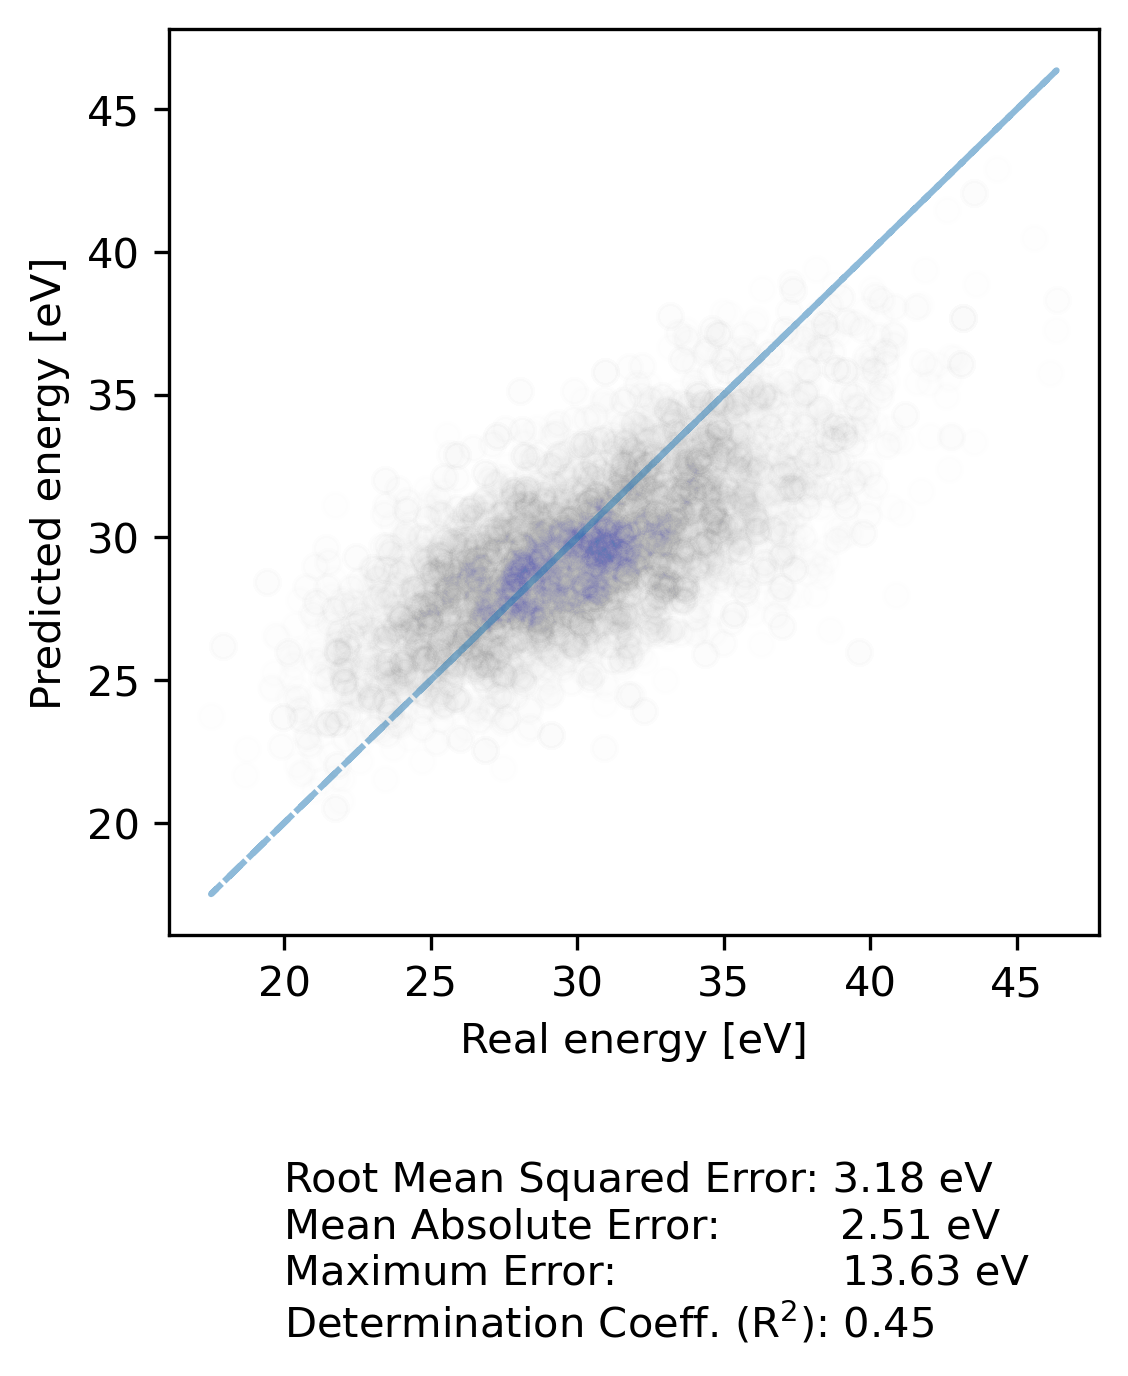

In [66]:
ns = 16
nl = 16

arch = ''
for i in range(nl):
    arch+='{},'.format(ns)

print ('Training regressor')
regr = MLPRegressor(hidden_layer_sizes=eval(arch),random_state=1, max_iter=200,activation='relu').fit(X_train, y_train)

print ('Testing regressor')
y_pred = regr.predict(X_test)

print ('Calcluating MAE ')
mean_absolute_error(y_test,y_pred)

print ('Numer of iterations', regr.n_iter_)



# Plot outputs
figsize = (4,4)

fig, ax = plt.subplots(figsize=figsize)
ax.scatter(y_test, y_pred,alpha=0.005)
ax.plot(y_train, y_train,'--',alpha=0.5,)
ax.set_xlabel('Real energy [eV]')
ax.set_ylabel('Predicted energy [eV]')

s = 'Root Mean Squared Error: %.2f eV \n' % mean_squared_error(y_test, y_pred, squared=False) \
  + 'Mean Absolute Error:         %.2f eV \n'   % mean_absolute_error(y_test, y_pred) \
  + 'Maximum Error:                 %.2f eV \n' % max(y_test - y_pred) \
  + 'Determination Coeff. (R$^{2}$): %.2f' % r2_score(y_test, y_pred)

ax.text(x=20,y=2.0,s=s)

Training regressor
Testing regressor
Calcluating MAE 
Numer of iterations 115


Text(20, 2.0, 'Root Mean Squared Error: 0.80 eV \nMean Absolute Error:         0.54 eV \nMaximum Error:                 6.18 eV \nDetermination Coeff. (R$^{2}$): 0.97')

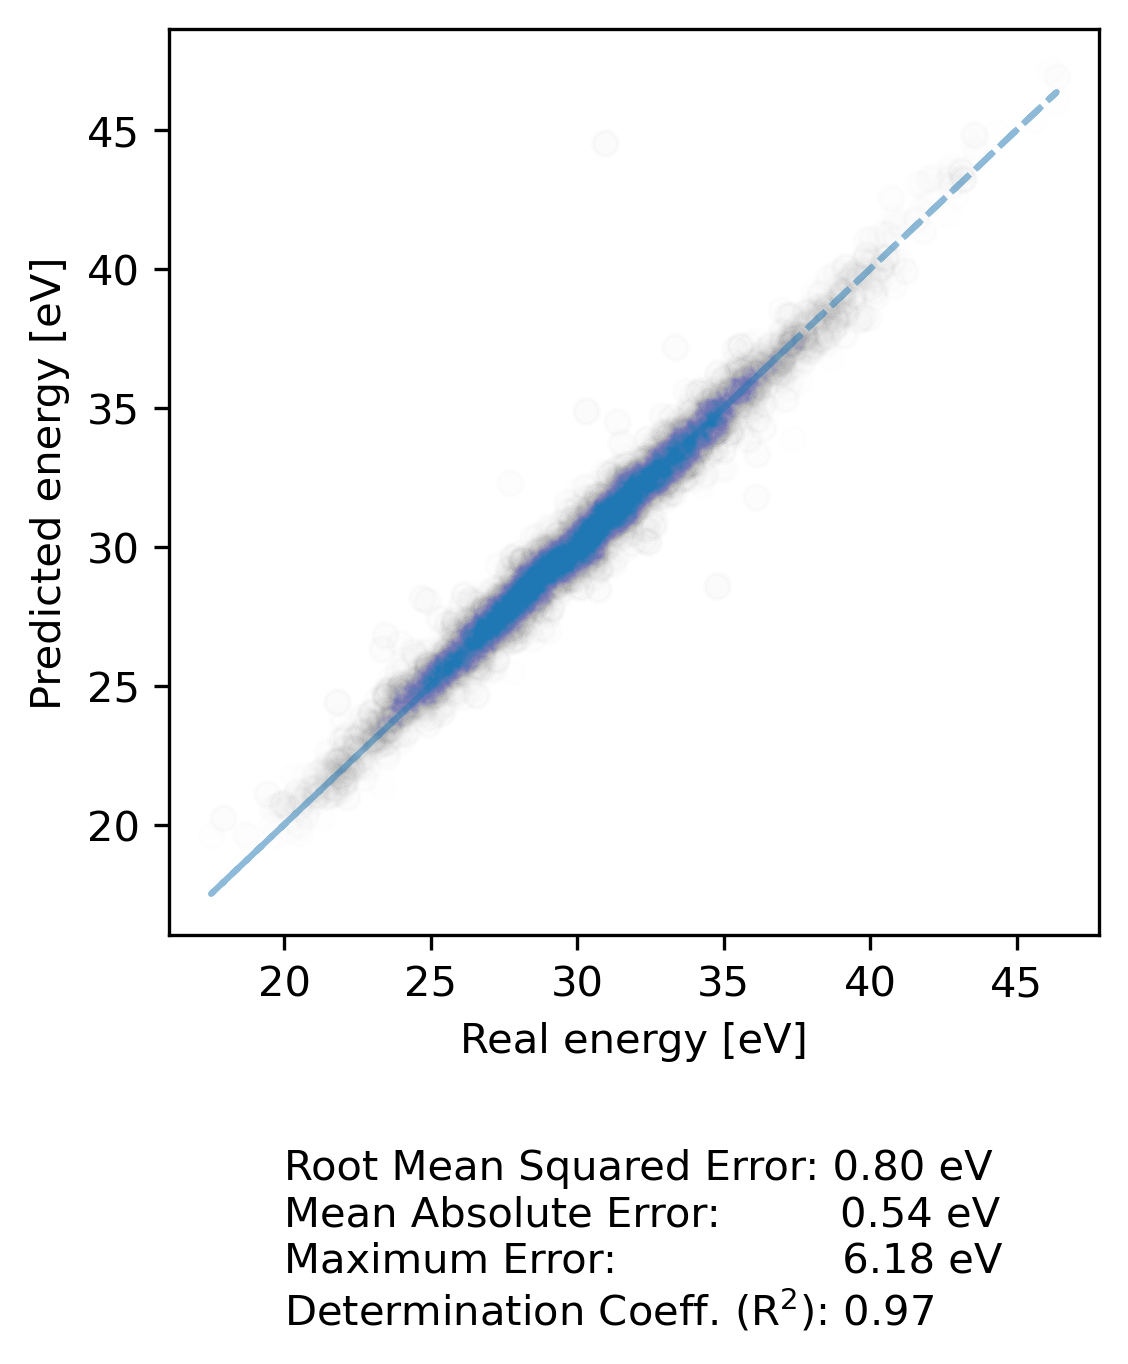

In [65]:
ns = 64
nl = 32

arch = ''
for i in range(nl):
    arch+='{},'.format(ns)

print ('Training regressor')
regr = MLPRegressor(hidden_layer_sizes=eval(arch),random_state=1, max_iter=200,activation='relu').fit(X_train, y_train)

print ('Testing regressor')
y_pred = regr.predict(X_test)

print ('Calcluating MAE ')
mean_absolute_error(y_test,y_pred)

print ('Numer of iterations', regr.n_iter_)



# Plot outputs
figsize = (4,4)

fig, ax = plt.subplots(figsize=figsize)
ax.scatter(y_test, y_pred,alpha=0.005)
ax.plot(y_train, y_train,'--',alpha=0.5,)
ax.set_xlabel('Real energy [eV]')
ax.set_ylabel('Predicted energy [eV]')

s = 'Root Mean Squared Error: %.2f eV \n' % mean_squared_error(y_test, y_pred, squared=False) \
  + 'Mean Absolute Error:         %.2f eV \n'   % mean_absolute_error(y_test, y_pred) \
  + 'Maximum Error:                 %.2f eV \n' % max(y_test - y_pred) \
  + 'Determination Coeff. (R$^{2}$): %.2f' % r2_score(y_test, y_pred)

ax.text(x=20,y=2.0,s=s)